In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
def parse_m4_hourly_dataset(file_path):
    """
    M4 시간별 데이터셋을 파싱하여 딕셔너리 형태로 반환합니다.
    각 키는 시계열 ID이고 값은 (시작시간, 값 리스트) 튜플입니다.
    """
    time_series_dict = {}
    data_started = False
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            
            # @data 태그를 찾아 실제 데이터 시작 부분을 확인
            if line == '@data':
                data_started = True
                continue
            
            if data_started and line:
                # 큰따옴표 제거 (있는 경우)
                if line.startswith('"') and line.endswith('"'):
                    line = line[1:-1]
                
                # ID, 시작시간, 데이터 값을 분리
                parts = line.split(':', 2)
                if len(parts) >= 3:
                    ts_id = parts[0]
                    start_time_str = parts[1]
                    values_str = parts[2]
                    
                    # 시작 시간 파싱
                    try:
                        # 포맷이 'YYYY-MM-DD HH-MM-SS'인 경우
                        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H-%M-%S')
                    except ValueError:
                        try:
                            # 다른 가능한 포맷 시도
                            start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
                        except ValueError:
                            print(f"시작 시간 '{start_time_str}' 파싱 실패, 기본값 사용")
                            start_time = datetime(2015, 1, 1)
                    
                    # 데이터 값 파싱
                    values = []
                    for val in values_str.split(','):
                        try:
                            values.append(float(val.strip()))
                        except ValueError:
                            # 숫자가 아닌 값은 NaN으로 처리
                            values.append(np.nan)
                    
                    time_series_dict[ts_id] = (start_time, values)
    
    return time_series_dict

In [5]:
def check_missing_values(time_series_dict):
    """
    시계열 데이터에서 결측값(NaN)을 확인합니다.
    """
    missing_stats = {
        'total_series': len(time_series_dict),
        'series_with_missing': 0,
        'total_values': 0,
        'total_missing': 0,
        'series_details': []
    }
    
    for ts_id, (start_time, values) in time_series_dict.items():
        total = len(values)
        missing = sum(np.isnan(v) for v in values)
        missing_ratio = missing / total if total > 0 else 0
        
        missing_stats['total_values'] += total
        missing_stats['total_missing'] += missing
        
        if missing > 0:
            missing_stats['series_with_missing'] += 1
            missing_stats['series_details'].append({
                'ts_id': ts_id,
                'total_values': total,
                'missing_values': missing,
                'missing_ratio': missing_ratio
            })
    
    # 전체 결측치 비율 계산
    if missing_stats['total_values'] > 0:
        missing_stats['overall_missing_ratio'] = missing_stats['total_missing'] / missing_stats['total_values']
    else:
        missing_stats['overall_missing_ratio'] = 0
    
    return missing_stats

In [6]:
def summarize_time_series_lengths(time_series_dict):
    """
    시계열 데이터의 길이 분포를 요약합니다.
    """
    length_distribution = {}
    series_lengths = {}
    
    for ts_id, (start_time, values) in time_series_dict.items():
        length = len(values)
        series_lengths[ts_id] = length
        
        if length in length_distribution:
            length_distribution[length] += 1
        else:
            length_distribution[length] = 1
    
    # 결과 딕셔너리
    length_stats = {
        'min_length': min(series_lengths.values()) if series_lengths else 0,
        'max_length': max(series_lengths.values()) if series_lengths else 0,
        'avg_length': sum(series_lengths.values()) / len(series_lengths) if series_lengths else 0,
        'length_distribution': dict(sorted(length_distribution.items())),
        'sample_lengths': {ts_id: length for ts_id, length in list(series_lengths.items())[:5]}  # 처음 5개 시계열 길이
    }
    
    return length_stats

In [7]:
# 파일 경로 설정
file_path = "./B group/m4_hourly_dataset.csv"  # 실제 경로로 변경하세요

# 데이터 로드
print(f"파일 '{file_path}'에서 M4 시간별 데이터셋 로드 중...")
time_series_dict = parse_m4_hourly_dataset(file_path)

# 로드된 시계열 수 확인
print(f"총 {len(time_series_dict)}개의 시계열이 로드되었습니다.")

파일 './B group/m4_hourly_dataset.csv'에서 M4 시간별 데이터셋 로드 중...
총 414개의 시계열이 로드되었습니다.


In [22]:
print(time_series_dict['T1'])

(datetime.datetime(2015, 7, 1, 12, 0), [605.0, 586.0, 586.0, 559.0, 511.0, 443.0, 422.0, 395.0, 382.0, 370.0, 383.0, 397.0, 420.0, 455.0, 493.0, 554.0, 610.0, 666.0, 715.0, 755.0, 778.0, 794.0, 806.0, 808.0, 776.0, 723.0, 709.0, 660.0, 585.0, 527.0, 462.0, 437.0, 413.0, 407.0, 404.0, 420.0, 441.0, 471.0, 526.0, 571.0, 612.0, 635.0, 613.0, 608.0, 614.0, 637.0, 669.0, 683.0, 687.0, 660.0, 661.0, 632.0, 573.0, 521.0, 481.0, 452.0, 447.0, 425.0, 427.0, 441.0, 438.0, 472.0, 528.0, 596.0, 661.0, 708.0, 754.0, 781.0, 808.0, 819.0, 820.0, 801.0, 770.0, 717.0, 697.0, 655.0, 607.0, 552.0, 512.0, 475.0, 452.0, 436.0, 429.0, 433.0, 430.0, 472.0, 536.0, 611.0, 662.0, 705.0, 707.0, 718.0, 733.0, 741.0, 737.0, 710.0, 647.0, 593.0, 564.0, 528.0, 507.0, 466.0, 428.0, 396.0, 382.0, 371.0, 374.0, 372.0, 373.0, 406.0, 451.0, 480.0, 487.0, 487.0, 494.0, 505.0, 519.0, 535.0, 560.0, 570.0, 551.0, 541.0, 552.0, 521.0, 477.0, 426.0, 395.0, 370.0, 357.0, 349.0, 362.0, 374.0, 402.0, 427.0, 456.0, 500.0, 558.0, 6

In [50]:
# 결측값 확인
missing_stats = check_missing_values(time_series_dict)

print("\n===== 결측값 통계 =====")
print(f"전체 시계열 수: {missing_stats['total_series']}")
print(f"결측값이 있는 시계열 수: {missing_stats['series_with_missing']}")
print(f"전체 데이터 포인트 수: {missing_stats['total_values']}")
print(f"전체 결측값 수: {missing_stats['total_missing']}")
print(f"전체 결측치 비율: {missing_stats['overall_missing_ratio']:.6f} ({missing_stats['overall_missing_ratio']*100:.4f}%)")

# 결측값이 있는 경우 세부 정보 표시
if missing_stats['series_with_missing'] > 0:
    print("\n결측값이 있는 시계열 세부 정보:")
    for detail in missing_stats['series_details']:
        print(f"  {detail['ts_id']}: {detail['missing_values']} 결측값 / {detail['total_values']} 전체 ({detail['missing_ratio']*100:.2f}%)")


===== 결측값 통계 =====
전체 시계열 수: 414
결측값이 있는 시계열 수: 0
전체 데이터 포인트 수: 373372
전체 결측값 수: 0
전체 결측치 비율: 0.000000 (0.0000%)


시계열 총 개수: 414
최소 길이: 748
최대 길이: 1008
평균 길이: 901.86

길이 분포:
  길이 748: 169개 시계열 (40.82%)
  길이 1008: 245개 시계열 (59.18%)

가장 짧은 시계열: T1 (길이: 748)
가장 긴 시계열: T170 (길이: 1008)

시작 시간 분포:
  2009-06-01: 17개 시계열
  2009-09-25: 1개 시계열
  2010-01-02: 18개 시계열
  2010-02-05: 1개 시계열
  2010-02-14: 3개 시계열
  2010-02-16: 1개 시계열
  2010-02-19: 1개 시계열
  2010-02-21: 1개 시계열
  2010-02-26: 1개 시계열
  2010-03-01: 1개 시계열
  2010-03-06: 1개 시계열
  2010-03-08: 1개 시계열
  2010-03-11: 1개 시계열
  2010-03-13: 1개 시계열
  2010-03-14: 2개 시계열
  2010-03-19: 1개 시계열
  2010-03-22: 1개 시계열
  2010-03-28: 3개 시계열
  2010-03-30: 1개 시계열
  2010-03-31: 3개 시계열
  2010-04-01: 1개 시계열
  2010-04-07: 1개 시계열
  2010-04-08: 2개 시계열
  2010-04-09: 2개 시계열
  2010-04-13: 4개 시계열
  2010-04-14: 2개 시계열
  2010-04-15: 1개 시계열
  2010-04-17: 2개 시계열
  2010-04-18: 2개 시계열
  2010-04-19: 2개 시계열
  2010-04-21: 2개 시계열
  2010-04-23: 3개 시계열
  2010-04-24: 2개 시계열
  2010-04-25: 2개 시계열
  2010-04-26: 3개 시계열
  2010-04-27: 1개 시계열
  2010-04-28: 1개 시계열
  2010-04-29: 1개 시계열
  2010-04-30: 2개 시계열
 

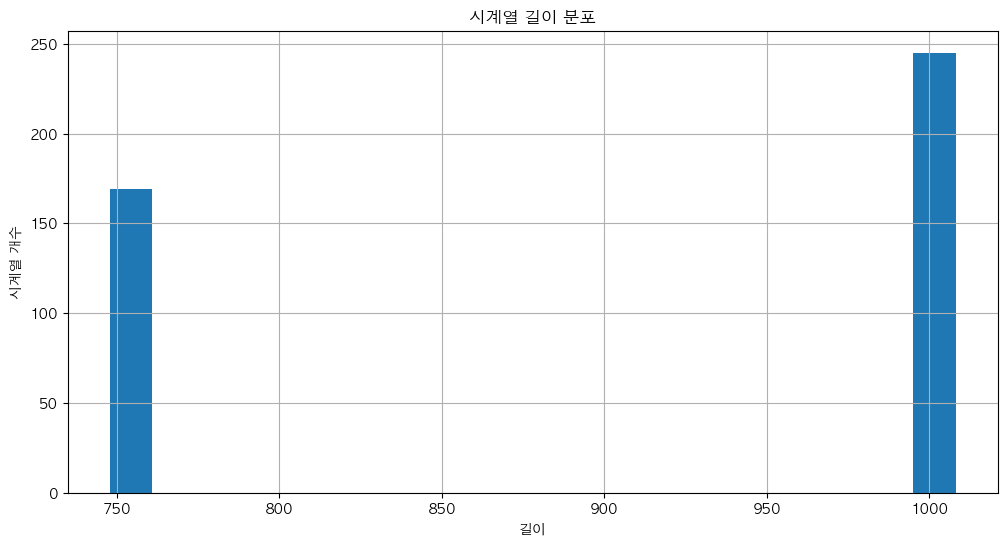

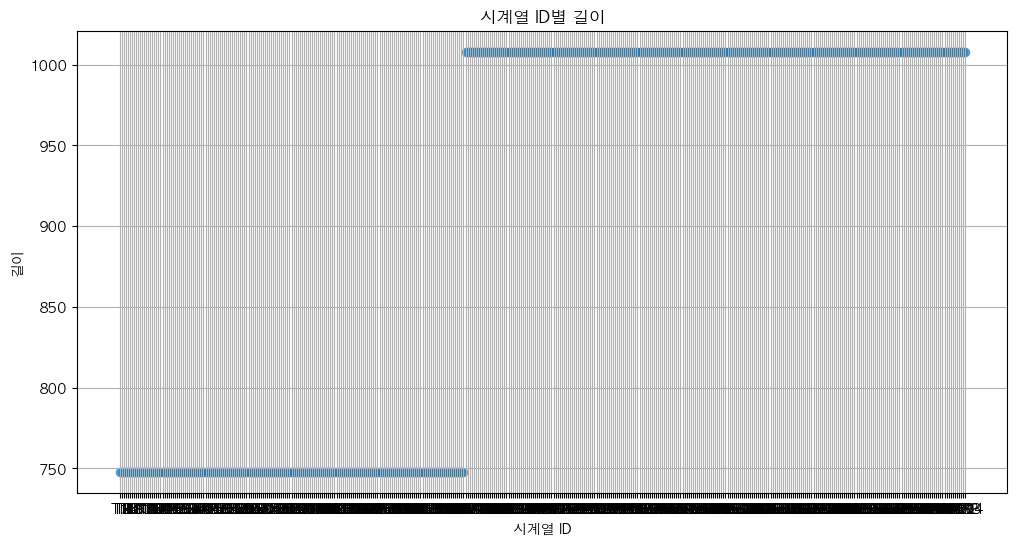

In [28]:
def check_time_series_lengths(time_series_dict):
    """
    시계열 데이터의 길이 분포를 확인하고 요약합니다.
    """
    # 각 시계열의 길이 저장
    lengths = {}
    
    for ts_id, (start_time, values) in time_series_dict.items():
        lengths[ts_id] = len(values)
    
    # 길이 분포 요약
    length_counts = {}
    for length in set(lengths.values()):
        length_counts[length] = list(lengths.values()).count(length)
    
    # 정렬된 길이 분포
    sorted_length_counts = dict(sorted(length_counts.items()))
    
    # 요약 통계
    min_length = min(lengths.values())
    max_length = max(lengths.values())
    avg_length = sum(lengths.values()) / len(lengths)
    
    print(f"시계열 총 개수: {len(lengths)}")
    print(f"최소 길이: {min_length}")
    print(f"최대 길이: {max_length}")
    print(f"평균 길이: {avg_length:.2f}")
    print("\n길이 분포:")
    for length, count in sorted_length_counts.items():
        print(f"  길이 {length}: {count}개 시계열 ({count/len(lengths)*100:.2f}%)")
    
    # 가장 짧은 시계열과 가장 긴 시계열 찾기
    shortest_ts = min(lengths, key=lengths.get)
    longest_ts = max(lengths, key=lengths.get)
    
    print(f"\n가장 짧은 시계열: {shortest_ts} (길이: {lengths[shortest_ts]})")
    print(f"가장 긴 시계열: {longest_ts} (길이: {lengths[longest_ts]})")
    
    # 시작 시간 분포 확인
    start_times = {}
    for ts_id, (start_time, _) in time_series_dict.items():
        start_time_str = start_time.strftime('%Y-%m-%d')
        if start_time_str not in start_times:
            start_times[start_time_str] = 0
        start_times[start_time_str] += 1
    
    print("\n시작 시간 분포:")
    for start_time, count in sorted(start_times.items()):
        print(f"  {start_time}: {count}개 시계열")
    
    return lengths

# 함수 실행
lengths = check_time_series_lengths(time_series_dict)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(list(lengths.values()), bins=20)
plt.title('시계열 길이 분포')
plt.xlabel('길이')
plt.ylabel('시계열 개수')
plt.grid(True)
plt.show()

# 길이에 따른 시계열 ID 분포 (산점도)
plt.figure(figsize=(12, 6))
plt.scatter(list(lengths.keys()), list(lengths.values()), alpha=0.6)
plt.title('시계열 ID별 길이')
plt.xlabel('시계열 ID')
plt.ylabel('길이')
plt.grid(True)
plt.show()


첫 번째 시계열 (T1)의 첫 10개 값:
[605.0, 586.0, 586.0, 559.0, 511.0, 443.0, 422.0, 395.0, 382.0, 370.0]


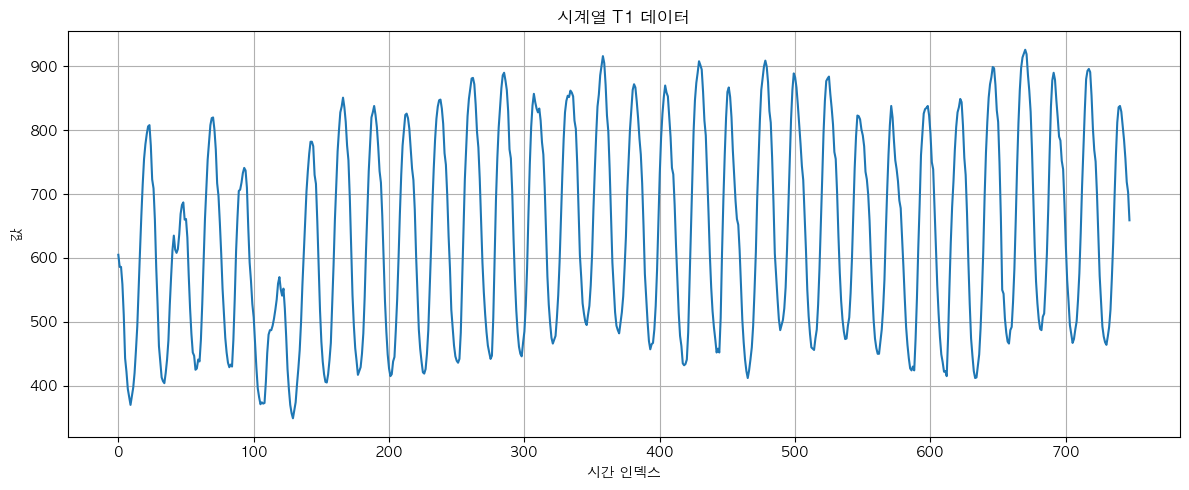

In [51]:
# 첫 번째 시계열 확인
if time_series_dict:
    first_ts_id = next(iter(time_series_dict))
    first_ts_start, first_ts_values = time_series_dict[first_ts_id]
    
    print(f"\n첫 번째 시계열 ({first_ts_id})의 첫 10개 값:")
    print(first_ts_values[:10])
    
    # 시각화
    plt.figure(figsize=(12, 5))
    plt.plot(first_ts_values)
    plt.title(f"시계열 {first_ts_id} 데이터")
    plt.xlabel("시간 인덱스")
    plt.ylabel("값")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## M4 시계열 데이터 EDA

In [52]:
def calculate_basic_statistics(time_series_dict):
    """
    각 시계열의 기본 통계량을 계산합니다.
    """
    stats = []
    
    for ts_id, (start_time, values) in time_series_dict.items():
        # NaN 값 제외한 유효한 값들만 사용
        values_clean = np.array([v for v in values if not np.isnan(v)])
        
        if len(values_clean) > 0:
            # 기본 통계량 계산
            stat = {
                'ts_id': ts_id,
                'length': len(values),
                'mean': np.mean(values_clean),
                'median': np.median(values_clean),
                'std': np.std(values_clean),
                'min': np.min(values_clean),
                'max': np.max(values_clean),
                'range': np.max(values_clean) - np.min(values_clean),
                'cv': np.std(values_clean) / np.mean(values_clean) if np.mean(values_clean) != 0 else np.nan
            }
            stats.append(stat)
    
    # DataFrame으로 변환
    stats_df = pd.DataFrame(stats)
    return stats_df

# 기본 통계량 계산 및 확인
statistics_df = calculate_basic_statistics(time_series_dict)

# 전체 통계량 요약
print("전체 시계열 통계량 요약:")
print(statistics_df.describe())

# 처음 5개 시계열의 통계량
print("\n처음 5개 시계열의 통계량:")
print(statistics_df.head())

전체 시계열 통계량 요약:
            length           mean         median           std            min  \
count   414.000000     414.000000     414.000000    414.000000     414.000000   
mean    901.864734    6859.557045    6825.917633   1288.294848    4382.021981   
std     127.945362   38772.268817   38899.041144   6521.625902   25921.786052   
min     748.000000      13.754464      13.550000      1.305876      10.000000   
25%     748.000000      18.688938      18.700000      4.073534      10.100000   
50%    1008.000000      83.509425      72.750000     54.086016      11.000000   
75%    1008.000000     938.614639     842.875000    398.633280     263.250000   
max    1008.000000  527471.171123  529786.000000  87788.210312  353551.000000   

                 max          range          cv  
count     414.000000     414.000000  414.000000  
mean     9729.239130    5347.217150    0.391473  
std     51986.350224   26140.175288    0.302052  
min        17.400000       3.800000    0.047000  
25%  

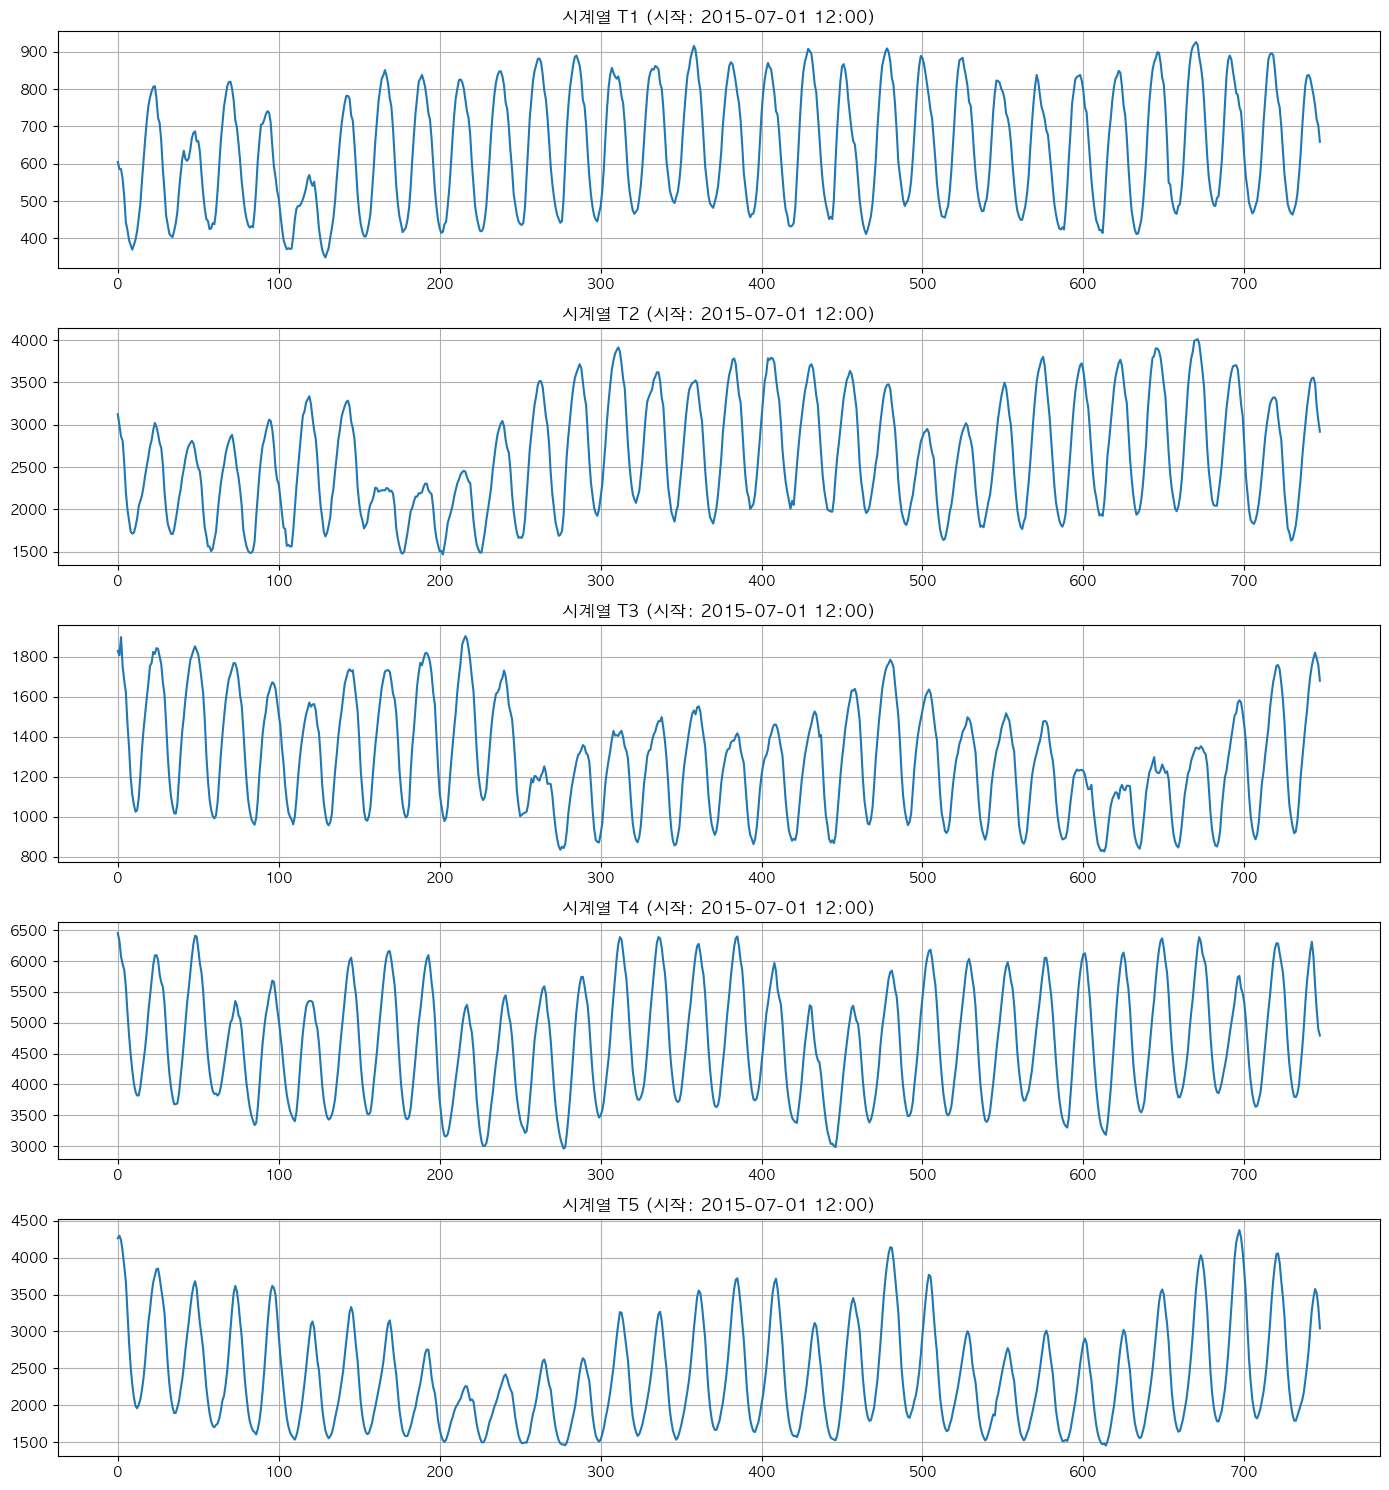

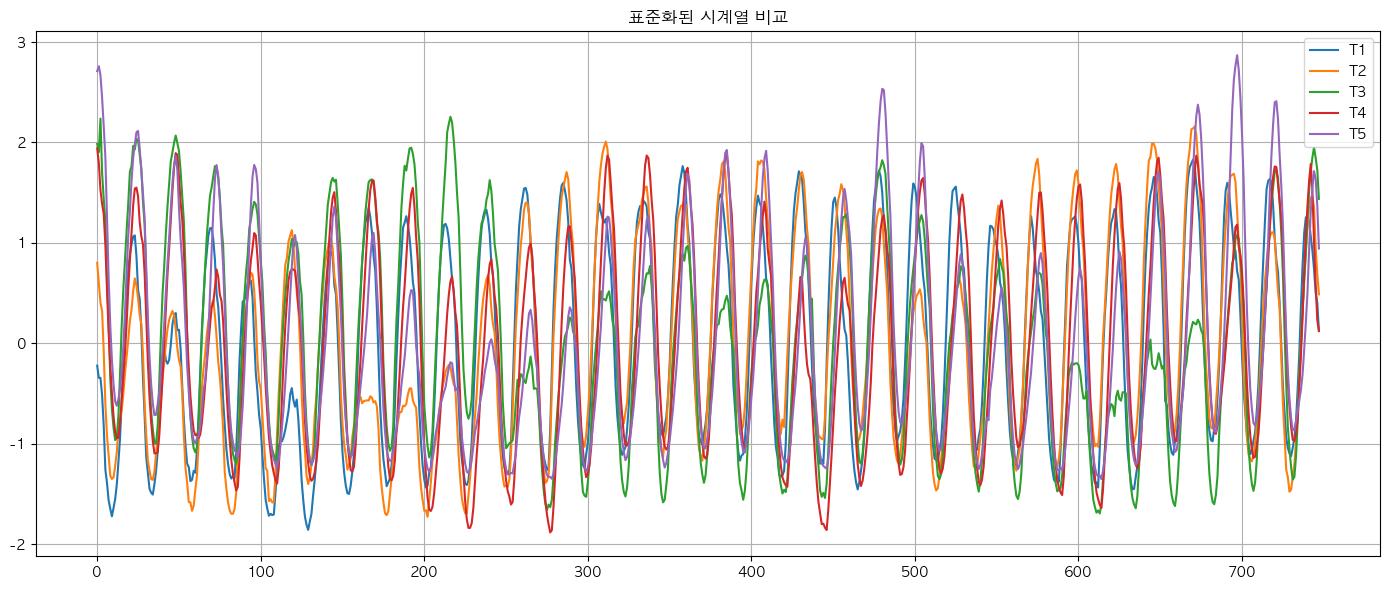

In [53]:
def visualize_sample_time_series(time_series_dict, num_samples=5):
    """
    샘플 시계열을 시각화합니다.
    """
    # 시각화할 시계열 ID 선택
    sample_ids = list(time_series_dict.keys())[:num_samples]
    
    # 1. 개별 시계열 플롯
    plt.figure(figsize=(14, 3*num_samples))
    
    for i, ts_id in enumerate(sample_ids):
        start_time, values = time_series_dict[ts_id]
        
        plt.subplot(num_samples, 1, i+1)
        plt.plot(values)
        plt.title(f'시계열 {ts_id} (시작: {start_time.strftime("%Y-%m-%d %H:%M")})')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 2. 다중 시계열 오버레이 (표준화 후)
    plt.figure(figsize=(14, 6))
    
    for ts_id in sample_ids:
        _, values = time_series_dict[ts_id]
        values_np = np.array(values)
        
        # 표준화 (Z-score)
        values_mean = np.mean(values_np)
        values_std = np.std(values_np)
        values_standardized = (values_np - values_mean) / values_std
        
        plt.plot(values_standardized, label=ts_id)
    
    plt.title('표준화된 시계열 비교')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 샘플 시계열 시각화
visualize_sample_time_series(time_series_dict)

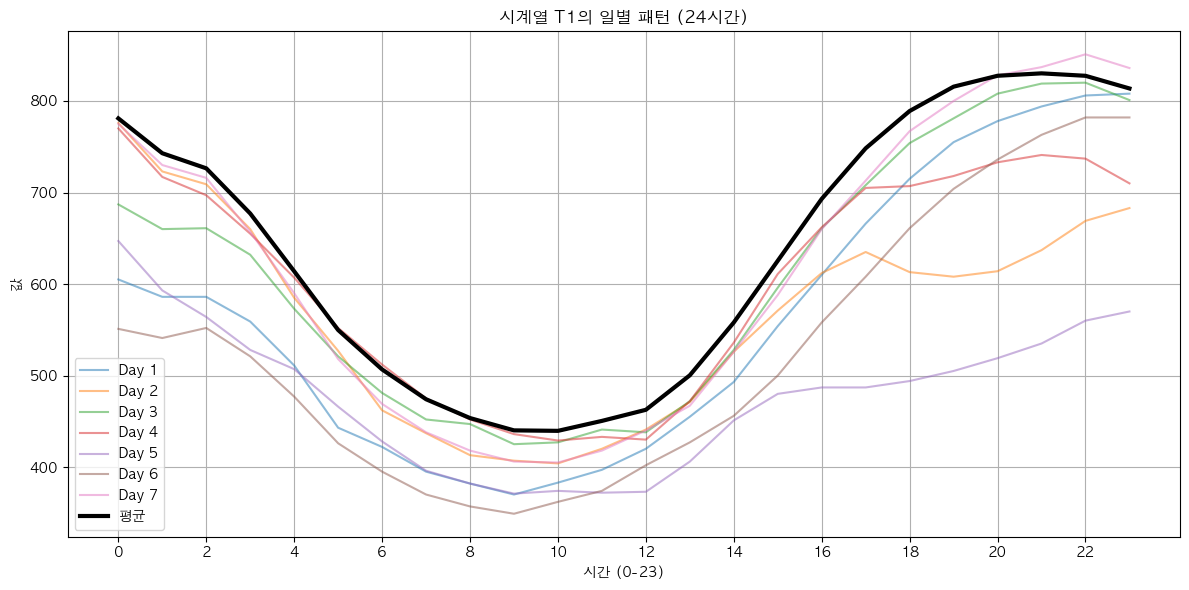

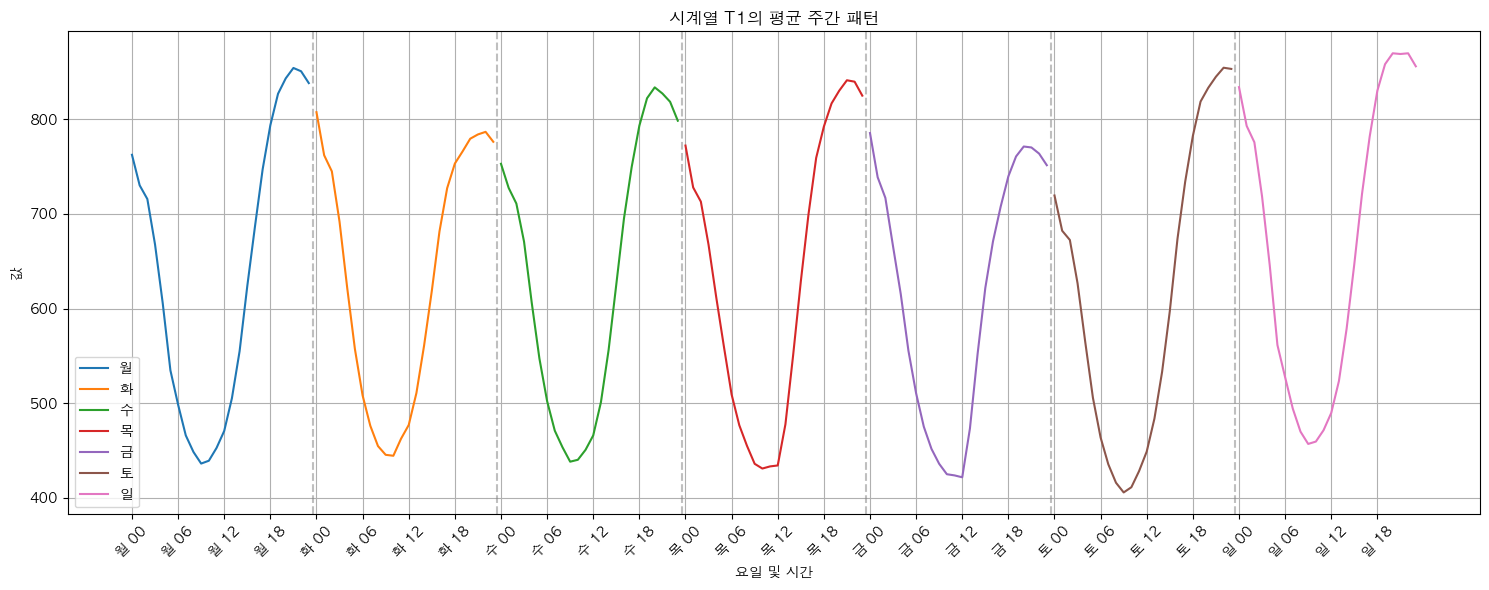

In [54]:
def visualize_daily_weekly_patterns(time_series_dict, sample_id=None):
    """
    일별/주별 패턴을 시각화합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # 일별 패턴 분석 (24시간)
    if len(values_np) >= 24:
        days = len(values_np) // 24
        daily_data = values_np[:days * 24].reshape(days, 24)
        
        plt.figure(figsize=(12, 6))
        
        # 각 날짜의 패턴
        for i in range(min(days, 7)):  # 최대 7일까지만 표시
            plt.plot(range(24), daily_data[i], alpha=0.5, label=f'Day {i+1}')
        
        # 평균 패턴
        plt.plot(range(24), daily_data.mean(axis=0), 'k-', linewidth=3, label='평균')
        
        plt.title(f'시계열 {sample_id}의 일별 패턴 (24시간)')
        plt.xlabel('시간 (0-23)')
        plt.ylabel('값')
        plt.xticks(range(0, 24, 2))
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # 주별 패턴 분석 (168시간 = 7일)
    if len(values_np) >= 168:
        weeks = len(values_np) // 168
        weekly_data = values_np[:weeks * 168].reshape(weeks, 168)
        
        plt.figure(figsize=(15, 6))
        
        # 평균 주간 패턴
        weekly_avg = weekly_data.mean(axis=0)
        days_of_week = ['월', '화', '수', '목', '금', '토', '일']
        
        for i in range(7):
            start_idx = i * 24
            end_idx = (i + 1) * 24
            plt.plot(range(start_idx, end_idx), weekly_avg[start_idx:end_idx], 
                     label=days_of_week[i])
            
            # 날짜 구분선
            if i < 6:
                plt.axvline(x=end_idx - 0.5, color='gray', linestyle='--', alpha=0.5)
        
        plt.title(f'시계열 {sample_id}의 평균 주간 패턴')
        plt.xlabel('요일 및 시간')
        plt.ylabel('값')
        
        # x축 레이블 설정
        x_ticks = []
        x_labels = []
        for i in range(7):
            for h in range(0, 24, 6):
                x_ticks.append(i * 24 + h)
                x_labels.append(f'{days_of_week[i]} {h:02d}')
        
        plt.xticks(x_ticks, x_labels, rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# 일별/주별 패턴 시각화 (첫 번째 시계열 사용)
first_ts_id = next(iter(time_series_dict.keys()))
visualize_daily_weekly_patterns(time_series_dict, first_ts_id)

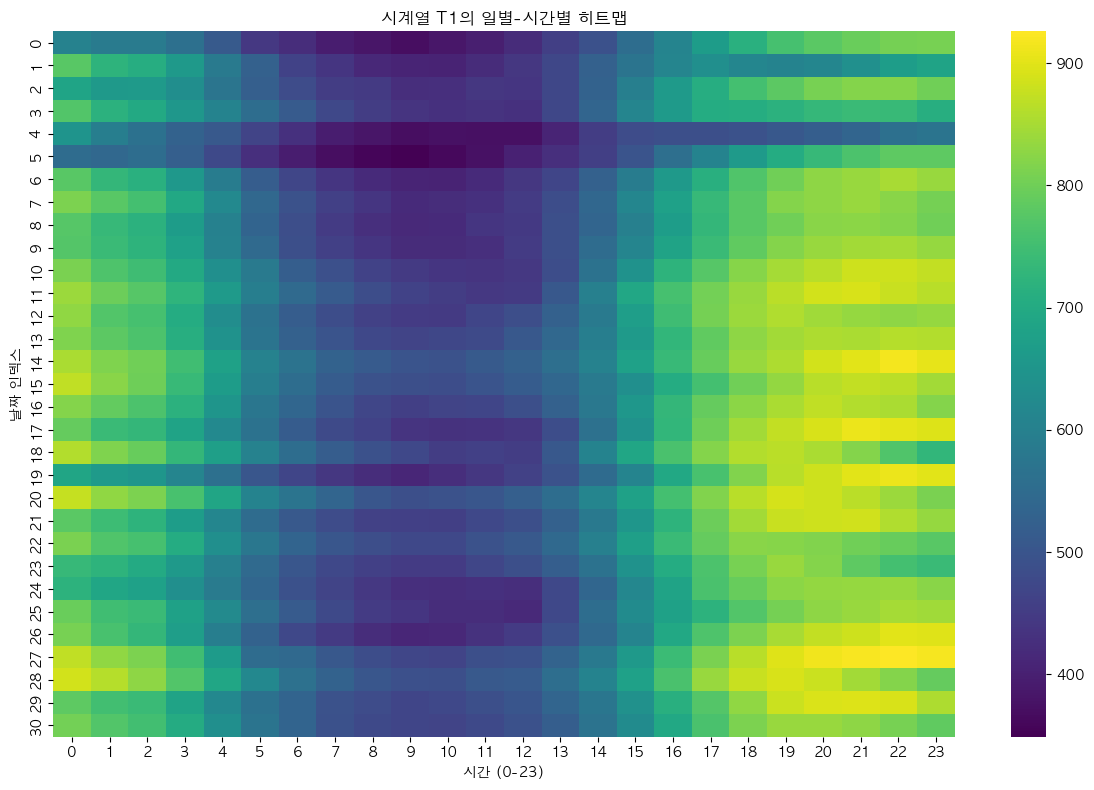

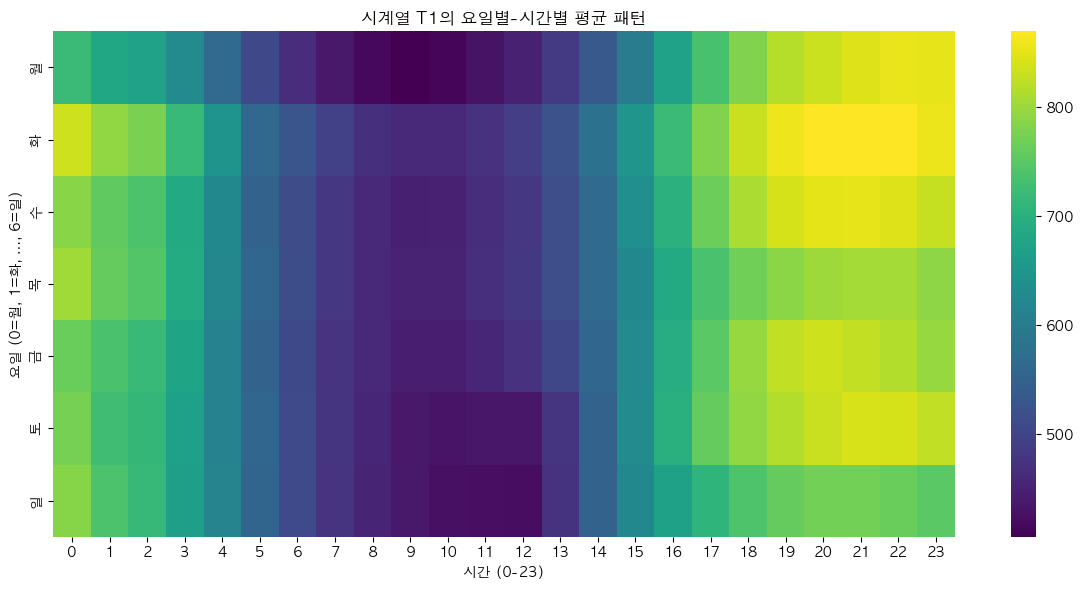

In [57]:
def visualize_heatmap(time_series_dict, sample_id=None):
    """
    시간대별 패턴을 히트맵으로 시각화합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # 일별 패턴 분석 (24시간)
    if len(values_np) >= 24:
        days = len(values_np) // 24
        daily_data = values_np[:days * 24].reshape(days, 24)
        
        plt.figure(figsize=(12, 8))
        
        # 히트맵
        sns.heatmap(daily_data, cmap='viridis')
        plt.title(f'시계열 {sample_id}의 일별-시간별 히트맵')
        plt.xlabel('시간 (0-23)')
        plt.ylabel('날짜 인덱스')
        plt.tight_layout()
        plt.show()
        
        # 요일별-시간별 패턴 (7일 주기가 있다고 가정)
        if days >= 7:
            # 첫 번째 날짜의 요일 확인
            start_weekday = start_time.weekday()  # 0=월요일, 1=화요일, ...
            
            # 모든 날짜의 요일 계산
            weekdays = [(start_weekday + i) % 7 for i in range(days)]
            
            # 요일별 데이터 그룹화
            weekday_data = {i: [] for i in range(7)}
            for day_idx, weekday in enumerate(weekdays):
                weekday_data[weekday].append(daily_data[day_idx])
            
            # 각 요일의 평균 패턴
            weekday_means = np.zeros((7, 24))
            for weekday, data in weekday_data.items():
                if data:  # 비어있지 않은 경우
                    weekday_means[weekday] = np.mean(data, axis=0)
            
            plt.figure(figsize=(12, 6))
            sns.heatmap(weekday_means, cmap='viridis')
            plt.title(f'시계열 {sample_id}의 요일별-시간별 평균 패턴')
            plt.xlabel('시간 (0-23)')
            plt.ylabel('요일 (0=월, 1=화, ..., 6=일)')
            plt.yticks(np.arange(7) + 0.5, ['월', '화', '수', '목', '금', '토', '일'])
            plt.tight_layout()
            plt.show()

# 히트맵 시각화
visualize_heatmap(time_series_dict, first_ts_id)

## SARIMA 적용

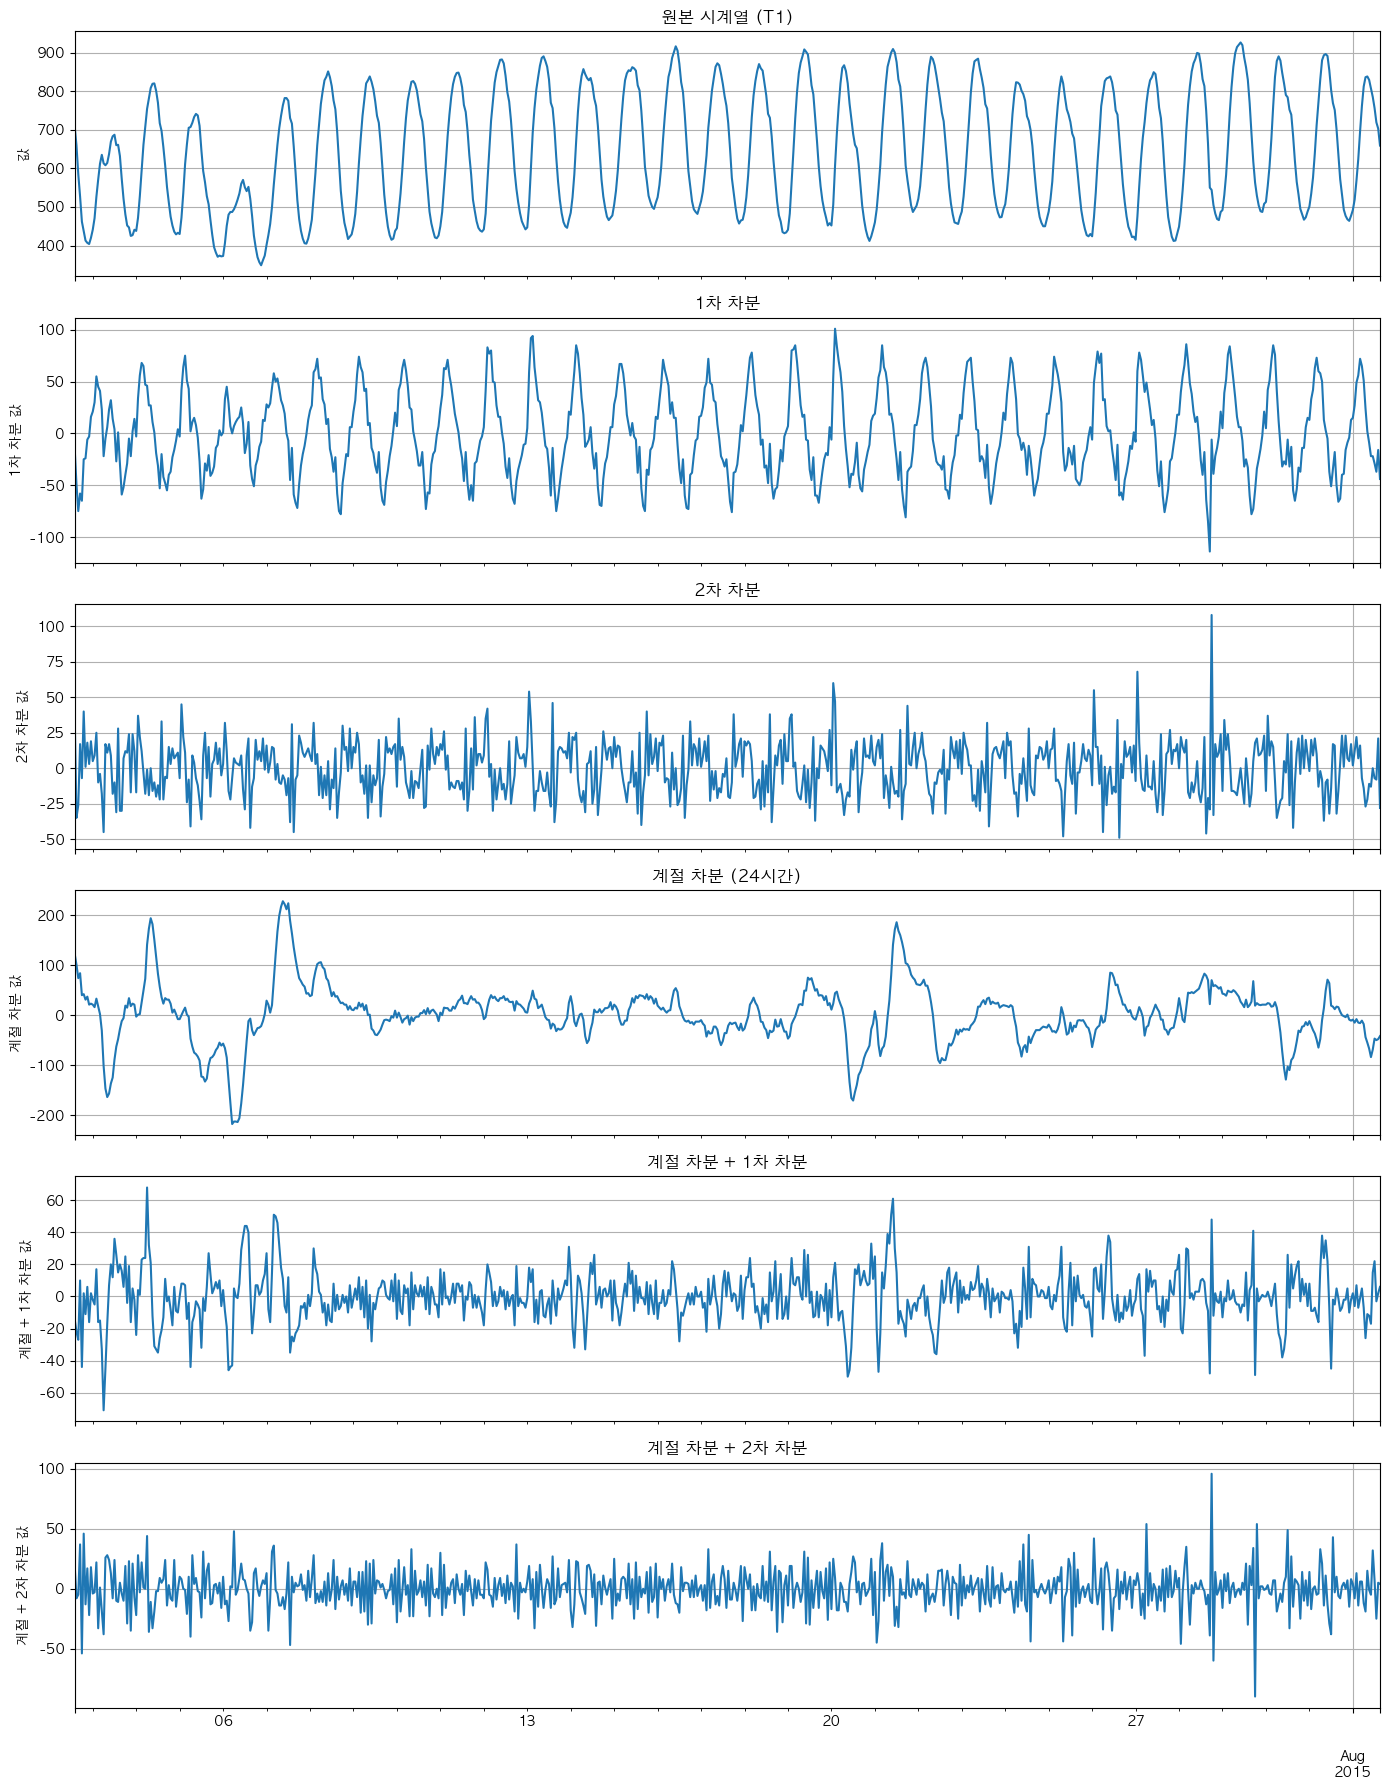


=== 원본 시계열 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -2.2417
  p-value: 0.1915
  정상성 여부: 비정상
KPSS 검정 결과:
  KPSS 통계량: 0.9406
  p-value: 0.0100
  정상성 여부: 비정상

=== 1차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -13.8171
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0078
  p-value: 0.1000
  정상성 여부: 정상

=== 2차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -19.1242
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0071
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -7.2179
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0653
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 + 1차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -11.3605
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0290
  p-value: 0.1000
  정상성 여부: 정상

=== 계절 차분 + 2차 차분 정상성 검정 ===
ADF 검정 결과:
  ADF 통계량: -12.8241
  p-value: 0.0000
  정상성 여부: 정상
KPSS 검정 결과:
  KPSS 통계량: 0.0766
  p-value: 0.1000
  정상성 여부: 정상


/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna())
/var/folders/jt/v4d5dk_n4kqf9wgbp9j7rg0w0000gn/T/ipykernel_3653/3732257675.py:90: InterpolationWarning: The test statistic is outside of th

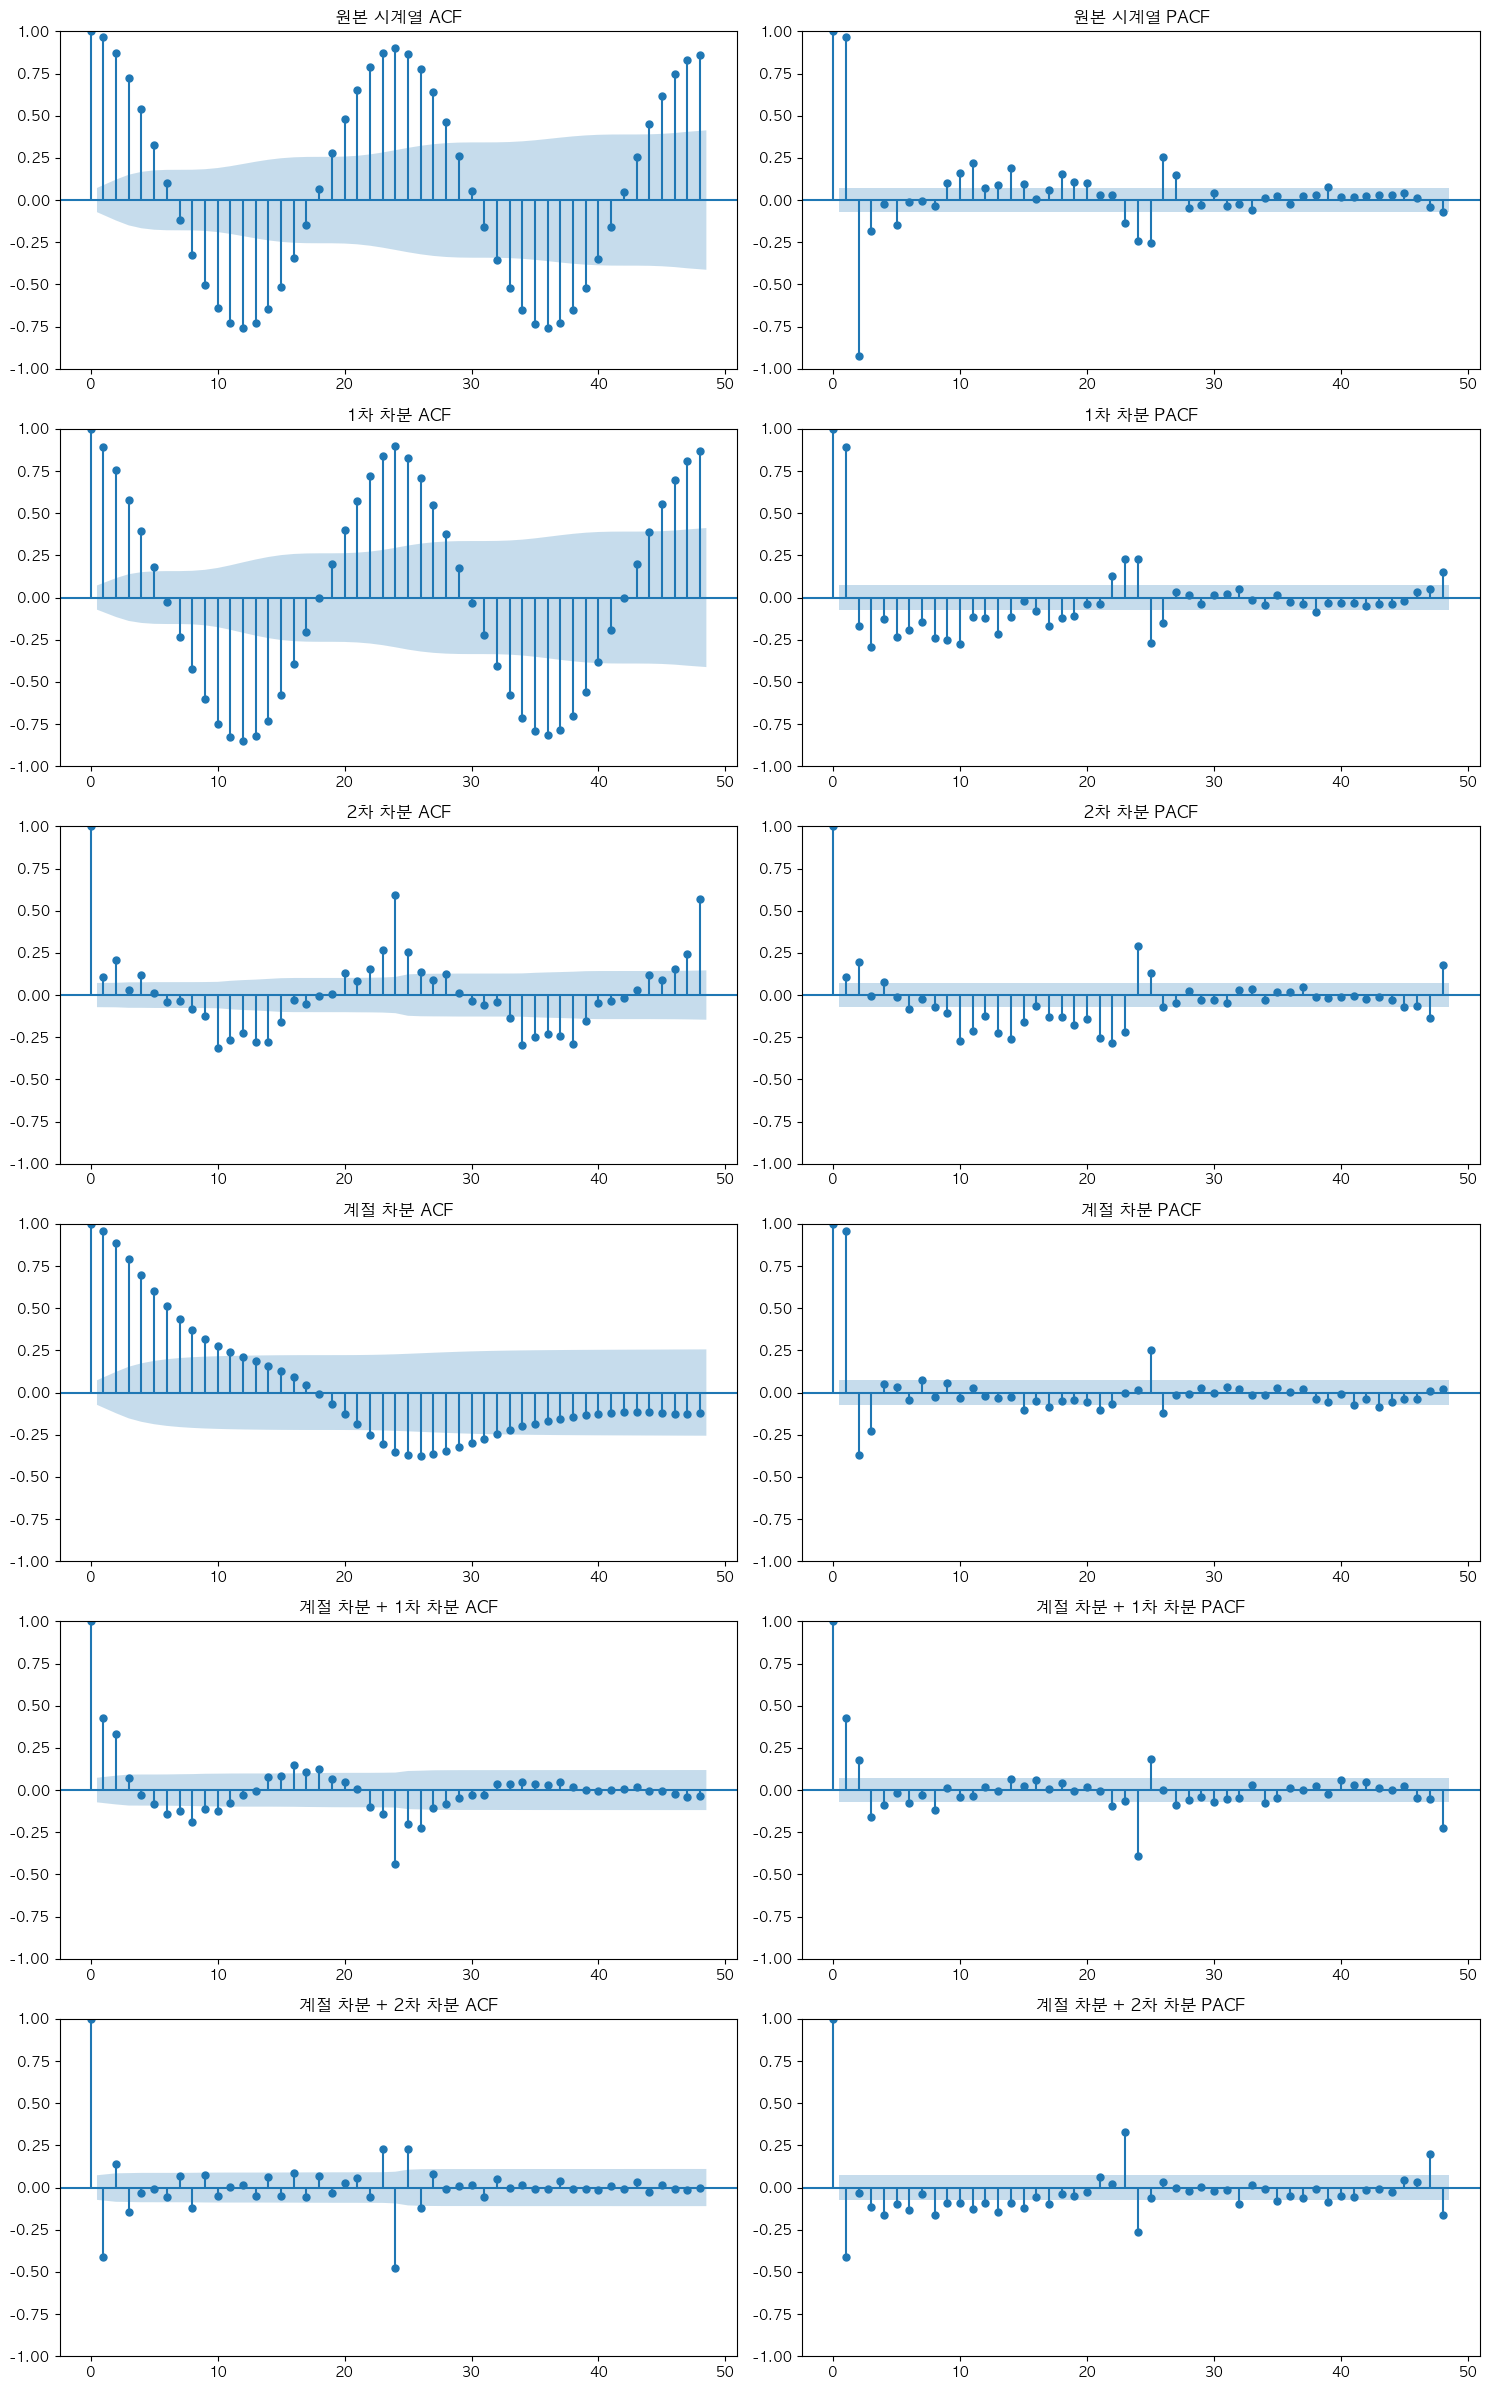

In [26]:
def apply_and_visualize_differencing(time_series_dict, sample_id=None):
    """
    시계열 데이터에 다양한 차분을 적용하고 시각화합니다:
    1. 1차 차분
    2. 2차 차분
    3. 계절 차분(24시간)
    4. 계절 차분 + 1차 차분
    5. 계절 차분 + 2차 차분
    
    각 단계별로 ADF 및 KPSS 정상성 검정을 수행합니다.
    """
    if sample_id is None:
        sample_id = next(iter(time_series_dict.keys()))
    
    start_time, values = time_series_dict[sample_id]
    values_np = np.array(values)
    
    # pandas Series로 변환 (날짜 인덱스 포함)
    date_range = pd.date_range(start=start_time, periods=len(values_np), freq='h')
    original_series = pd.Series(values_np, index=date_range)
    
    # 차분 적용
    # 1. 1차 차분
    diff1 = original_series.diff().dropna()
    
    # 2. 2차 차분
    diff2 = diff1.diff().dropna()
    
    # 3. 계절 차분 (24시간)
    seasonal_diff = original_series.diff(periods=24).dropna()
    
    # 4. 계절 차분 + 1차 차분
    seasonal_diff1 = seasonal_diff.diff().dropna()
    
    # 5. 계절 차분 + 2차 차분
    seasonal_diff2 = seasonal_diff1.diff().dropna()
    
    # 차분 적용 결과 시각화
    fig, axes = plt.subplots(6, 1, figsize=(14, 18), sharex=True)
    
    # 원본 시계열
    original_series.plot(ax=axes[0], title=f'원본 시계열 ({sample_id})')
    axes[0].set_ylabel('값')
    axes[0].grid(True)
    
    # 1차 차분
    diff1.plot(ax=axes[1], title=f'1차 차분')
    axes[1].set_ylabel('1차 차분 값')
    axes[1].grid(True)
    
    # 2차 차분
    diff2.plot(ax=axes[2], title=f'2차 차분')
    axes[2].set_ylabel('2차 차분 값')
    axes[2].grid(True)
    
    # 계절 차분 (24시간)
    seasonal_diff.plot(ax=axes[3], title=f'계절 차분 (24시간)')
    axes[3].set_ylabel('계절 차분 값')
    axes[3].grid(True)
    
    # 계절 차분 + 1차 차분
    seasonal_diff1.plot(ax=axes[4], title=f'계절 차분 + 1차 차분')
    axes[4].set_ylabel('계절 + 1차 차분 값')
    axes[4].grid(True)
    
    # 계절 차분 + 2차 차분
    seasonal_diff2.plot(ax=axes[5], title=f'계절 차분 + 2차 차분')
    axes[5].set_ylabel('계절 + 2차 차분 값')
    axes[5].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # ADF 및 KPSS 정상성 검정
    from statsmodels.tsa.stattools import adfuller, kpss
    
    # 정상성 검정 함수
    def run_stationarity_tests(series, name):
        print(f"\n=== {name} 정상성 검정 ===")
        
        # ADF 검정
        adf_result = adfuller(series.dropna())
        print(f"ADF 검정 결과:")
        print(f'  ADF 통계량: {adf_result[0]:.4f}')
        print(f'  p-value: {adf_result[1]:.4f}')
        print(f'  정상성 여부: {"정상" if adf_result[1] < 0.05 else "비정상"}')
        
        # KPSS 검정
        try:
            kpss_result = kpss(series.dropna())
            print(f"KPSS 검정 결과:")
            print(f'  KPSS 통계량: {kpss_result[0]:.4f}')
            print(f'  p-value: {kpss_result[1]:.4f}')
            print(f'  정상성 여부: {"정상" if kpss_result[1] > 0.05 else "비정상"}')
        except:
            print("KPSS 검정 실패 - 시계열 특성이나 길이 문제일 수 있습니다.")
    
    # 각 시계열에 대한 정상성 검정
    run_stationarity_tests(original_series, "원본 시계열")
    run_stationarity_tests(diff1, "1차 차분")
    run_stationarity_tests(diff2, "2차 차분")
    run_stationarity_tests(seasonal_diff, "계절 차분")
    run_stationarity_tests(seasonal_diff1, "계절 차분 + 1차 차분")
    run_stationarity_tests(seasonal_diff2, "계절 차분 + 2차 차분")
    
    # ACF/PACF 분석
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    # 각 시계열의 ACF/PACF 시각화
    fig, axes = plt.subplots(6, 2, figsize=(15, 24))
    
    # 차분별 시계열 및 이름 목록
    series_list = [
        (original_series, "원본 시계열"),
        (diff1, "1차 차분"),
        (diff2, "2차 차분"),
        (seasonal_diff, "계절 차분"),
        (seasonal_diff1, "계절 차분 + 1차 차분"),
        (seasonal_diff2, "계절 차분 + 2차 차분")
    ]
    
    # 각 시계열에 대한 ACF/PACF 시각화
    for i, (series, name) in enumerate(series_list):
        try:
            plot_acf(series.dropna(), lags=48, ax=axes[i, 0])
            axes[i, 0].set_title(f'{name} ACF')
            
            plot_pacf(series.dropna(), lags=48, ax=axes[i, 1])
            axes[i, 1].set_title(f'{name} PACF')
        except:
            axes[i, 0].text(0.5, 0.5, f"ACF 계산 실패", ha='center', va='center')
            axes[i, 1].text(0.5, 0.5, f"PACF 계산 실패", ha='center', va='center')
            axes[i, 0].set_title(f'{name} ACF')
            axes[i, 1].set_title(f'{name} PACF')
    
    plt.tight_layout()
    plt.show()
    
    # 결과 시계열 반환
    return {
        "original": original_series,
        "diff1": diff1,
        "diff2": diff2,
        "seasonal_diff": seasonal_diff,
        "seasonal_diff1": seasonal_diff1,
        "seasonal_diff2": seasonal_diff2
    }

first_ts_id = next(iter(time_series_dict.keys()))
diff_results = apply_and_visualize_differencing(time_series_dict, first_ts_id)

훈련 데이터 크기: 700
테스트 데이터 크기: 48
SARIMA 모델 학습 중...
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  700
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -2461.204
Date:                            Tue, 11 Mar 2025   AIC                           4934.409
Time:                                    18:29:55   BIC                           4961.261
Sample:                                07-01-2015   HQIC                          4944.825
                                     - 07-30-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0764      0.171     -0.447      0.655      -0.411

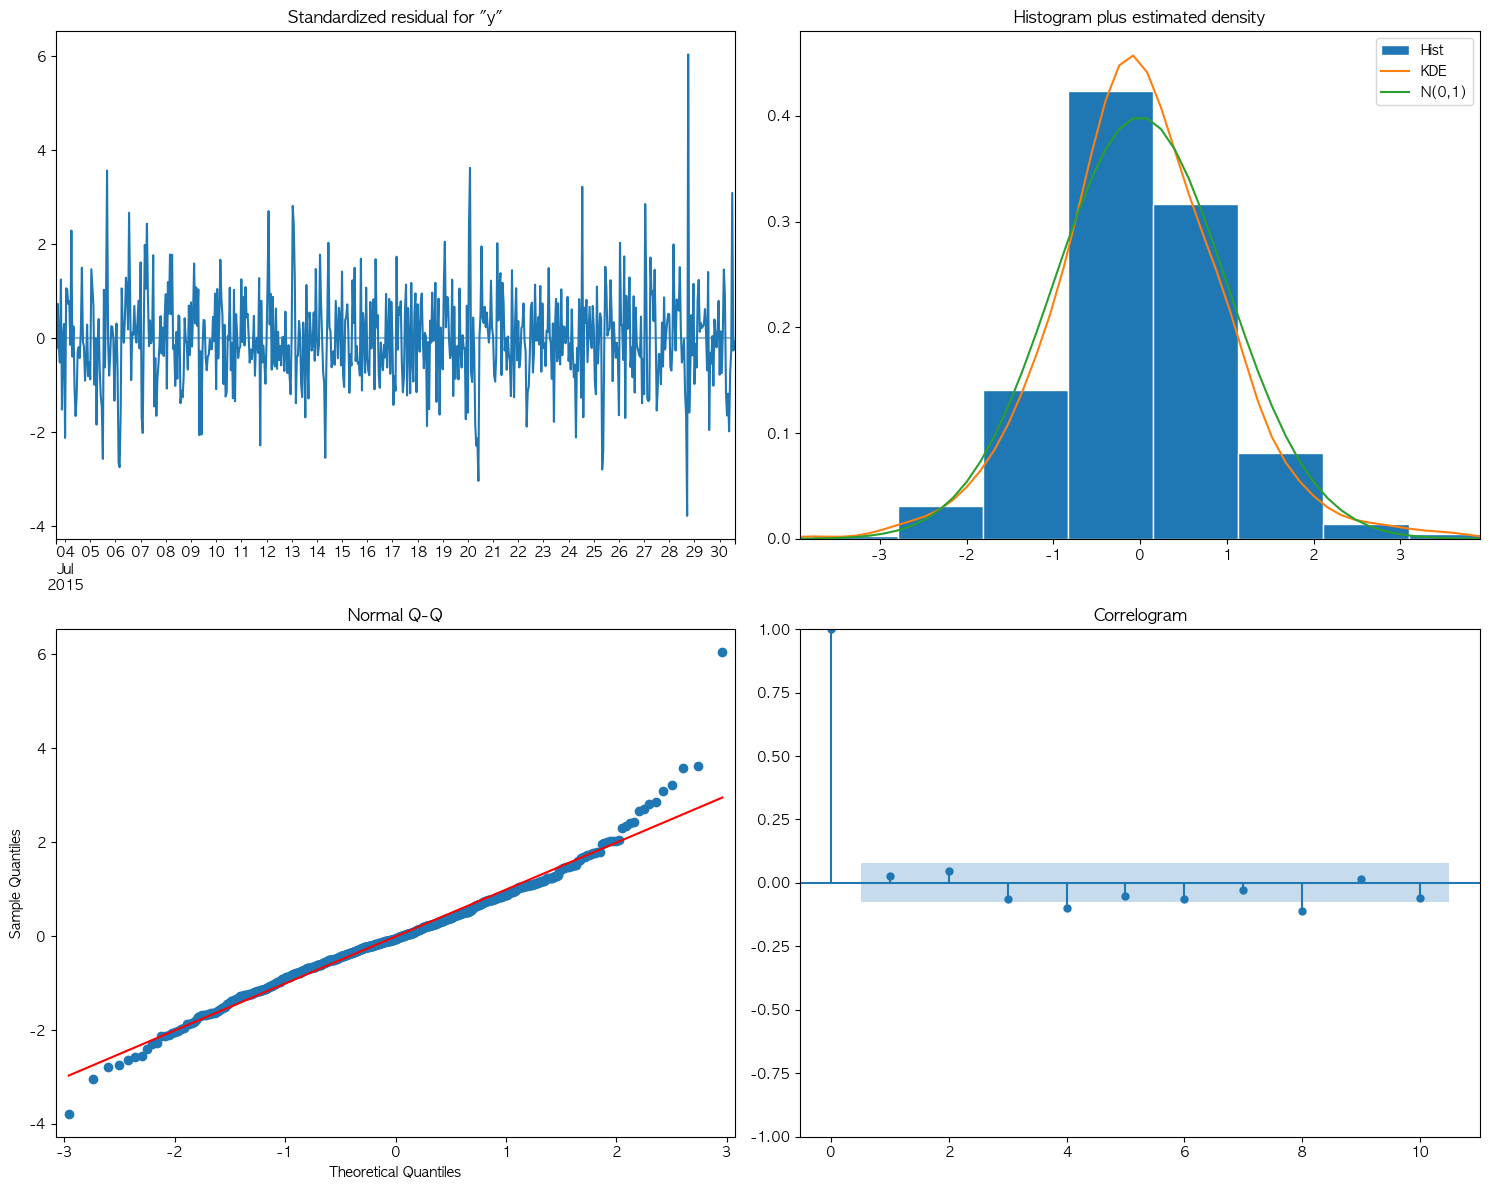

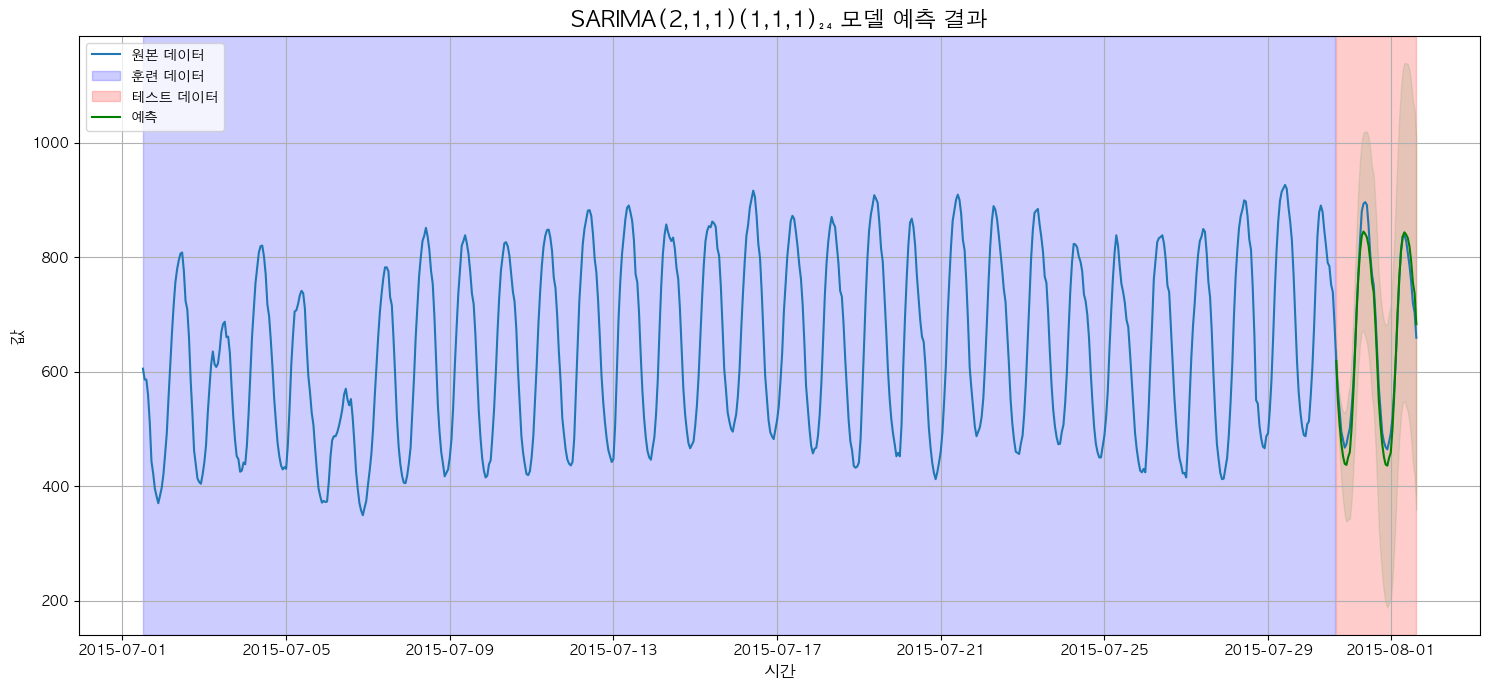

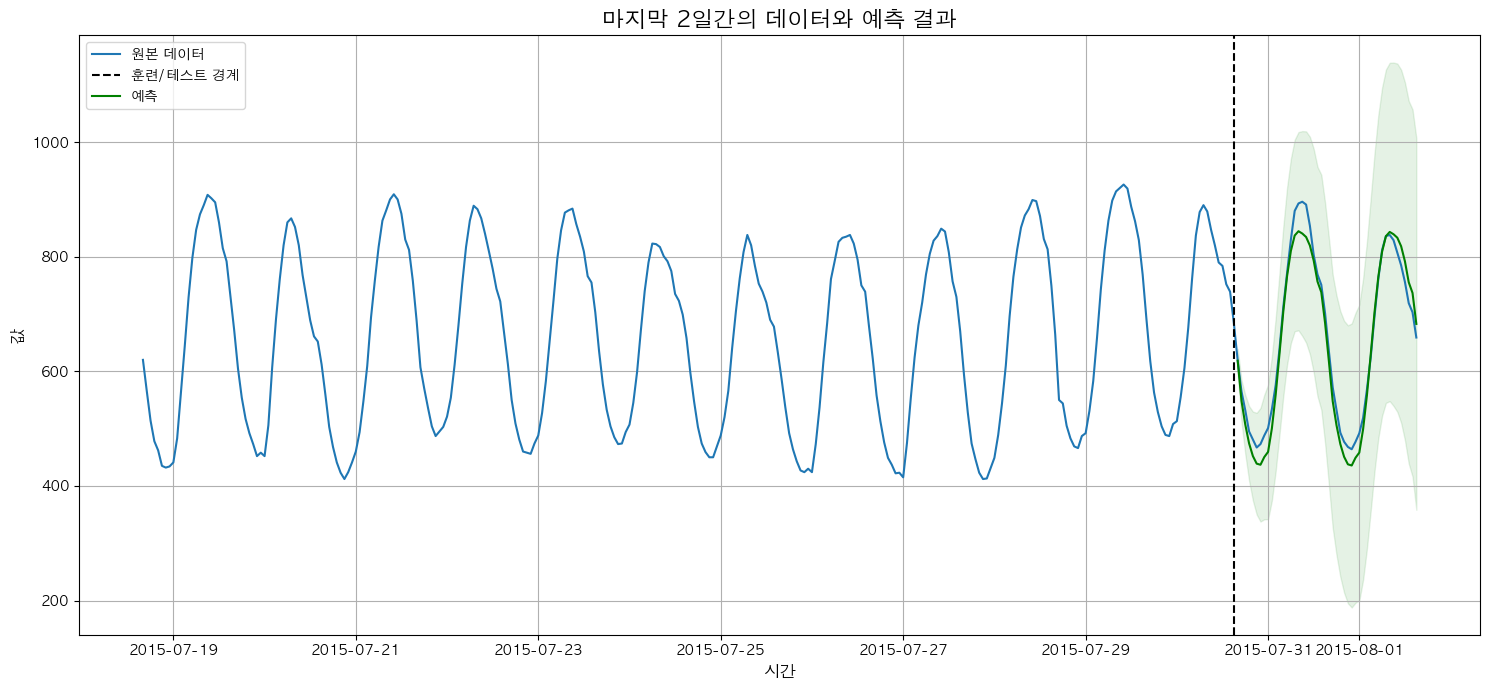

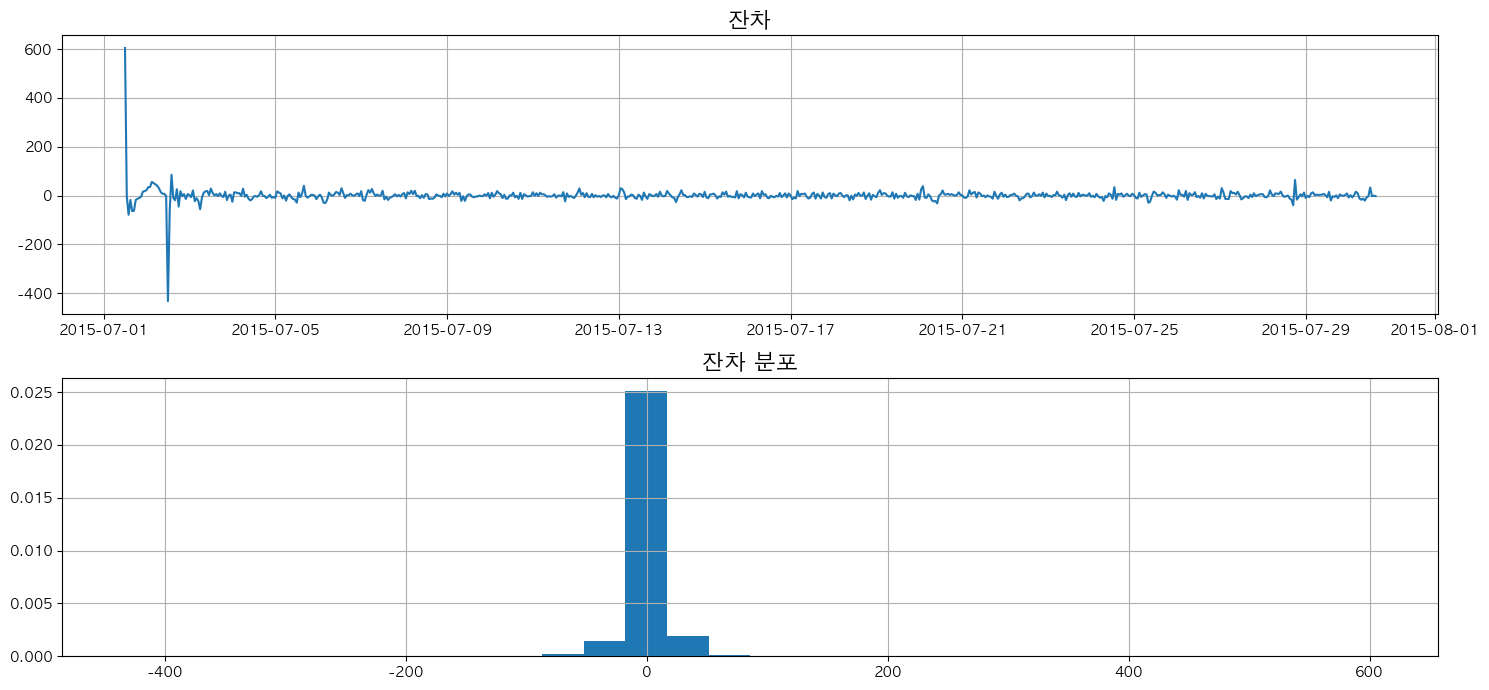

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 준비 (T1 시계열 데이터 사용)
def get_time_series_data(time_series_dict, ts_id='T1'):
    start_time, values = time_series_dict[ts_id]
    date_range = pd.date_range(start=start_time, periods=len(values), freq='h')
    return pd.Series(values, index=date_range)

# 시계열 데이터 가져오기
ts_data = get_time_series_data(time_series_dict, 'T1')

# 훈련/테스트 세트 분할 (마지막 168시간(7일)을 테스트 데이터로 사용)
train_size = len(ts_data) - 48
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

print(f'훈련 데이터 크기: {len(train_data)}')
print(f'테스트 데이터 크기: {len(test_data)}')

# SARIMA(2,1,1)(1,1,1)24 모델 구현
sarima_model = SARIMAX(
    train_data,
    order=(2, 1, 1),             # 비계절 부분: (p, d, q)
    seasonal_order=(1, 1, 1, 24), # 계절 부분: (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 모델 학습
print('SARIMA 모델 학습 중...')
sarima_results = sarima_model.fit(disp=False)

# 모델 요약 출력
print(sarima_results.summary())

# 예측 수행
forecast_steps = len(test_data)
print(f'{forecast_steps}시간 예측 수행 중...')
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 예측 성능 평가
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
mape = np.mean(np.abs((test_data - forecast_mean) / test_data)) * 100

print(f'평가 지표:')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

# 모델 진단
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.tight_layout()
plt.show()

# 예측 결과 시각화
plt.figure(figsize=(15, 7))

# 원본 데이터
plt.plot(ts_data, label='원본 데이터')

# 훈련 데이터 영역 표시
plt.axvspan(ts_data.index[0], ts_data.index[train_size-1], alpha=0.2, color='blue', label='훈련 데이터')

# 테스트 데이터 영역 표시
plt.axvspan(ts_data.index[train_size], ts_data.index[-1], alpha=0.2, color='red', label='테스트 데이터')

# 예측값
plt.plot(forecast_mean, 'g', label='예측')

# 신뢰구간
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='g', alpha=0.1
)

plt.title('SARIMA(2,1,1)(1,1,1)₂₄ 모델 예측 결과', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 마지막 2주간의 데이터와 예측 결과를 확대해서 시각화
plt.figure(figsize=(15, 7))

# 마지막 2주간(336시간)의 데이터
last_n = 336
last_n_data = ts_data[-last_n:]

# 원본 데이터
plt.plot(last_n_data, label='원본 데이터')

# 훈련/테스트 경계
train_end = ts_data.index[train_size-1]
plt.axvline(train_end, linestyle='--', color='k', label='훈련/테스트 경계')

# 예측값
plt.plot(forecast_mean, 'g', label='예측')

# 신뢰구간
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='g', alpha=0.1
)

plt.title('마지막 2일간의 데이터와 예측 결과', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('값', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 잔차 분석
residuals = sarima_results.resid[~np.isnan(sarima_results.resid)]

plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(residuals)
plt.title('잔차', fontsize=16)
plt.grid(True)

plt.subplot(212)
plt.hist(residuals, bins=30, density=True)
plt.title('잔차 분포', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

## 모델 성능 비교 (SES, Theta, TBATS, HW_ETS, AUTO SARIMA, Prophet)

In [1]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import warnings
from tqdm import tqdm
import concurrent.futures
import os
import pickle
import gc  # 가비지 컬렉션 모듈 추가
import logging

# 시계열 예측 모델들
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import SimpleExpSmoothing
from prophet import Prophet
from tbats import TBATS
from statsmodels.tsa.stattools import acf, pacf

# 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# 로깅 설정
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
logging.getLogger('stan').setLevel(logging.ERROR)

# 경고 제외
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

# matplotlib 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# 결과 저장 디렉토리
RESULTS_DIR = './model_results'
os.makedirs(RESULTS_DIR, exist_ok=True)

# Theta 모델 구현 (statsmodels에서 직접 제공하지 않음)
def theta_model(y, h=48):
    """
    Theta 모델 구현
    
    Parameters:
    y (array-like): 입력 시계열 데이터
    h (int): 예측할 기간 수
    
    Returns:
    array: 예측값 배열
    """
    y = np.asarray(y)
    n = len(y)
    
    # 시계열 분해
    t = np.arange(1, n+1)
    X = np.column_stack((np.ones(n), t))
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # 추세 성분 및 잔차 추출
    trend = X @ beta
    resid = y - trend
    
    # SES를 사용한 잔차 예측
    ses_model = SimpleExpSmoothing(resid).fit(optimized=True)
    resid_forecast = ses_model.forecast(h)
    
    # 추세 예측
    t_new = np.arange(n+1, n+h+1)
    X_new = np.column_stack((np.ones(h), t_new))
    trend_forecast = X_new @ beta
    
    # 최종 예측: 추세 + 잔차
    forecast = trend_forecast + resid_forecast
    
    return forecast

# 데이터 로드 함수
def parse_m4_hourly_dataset(file_path):
    """
    M4 시간별 데이터셋을 파싱하여 딕셔너리 형태로 반환합니다.
    각 키는 시계열 ID이고 값은 (시작시간, 값 리스트) 튜플입니다.
    """
    time_series_dict = {}
    data_started = False
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            
            # @data 태그를 찾아 실제 데이터 시작 부분을 확인
            if line == '@data':
                data_started = True
                continue
            
            if data_started and line:
                # 큰따옴표 제거 (있는 경우)
                if line.startswith('"') and line.endswith('"'):
                    line = line[1:-1]
                
                # ID, 시작시간, 데이터 값을 분리
                parts = line.split(':', 2)
                if len(parts) >= 3:
                    ts_id = parts[0]
                    start_time_str = parts[1]
                    values_str = parts[2]
                    
                    # 시작 시간 파싱
                    try:
                        # 포맷이 'YYYY-MM-DD HH-MM-SS'인 경우
                        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H-%M-%S')
                    except ValueError:
                        try:
                            # 다른 가능한 포맷 시도
                            start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
                        except ValueError:
                            print(f"시작 시간 '{start_time_str}' 파싱 실패, 기본값 사용")
                            start_time = datetime(2015, 1, 1)
                    
                    # 데이터 값 파싱
                    values = []
                    for val in values_str.split(','):
                        try:
                            values.append(float(val.strip()))
                        except ValueError:
                            # 숫자가 아닌 값은 NaN으로 처리
                            values.append(np.nan)
                    
                    time_series_dict[ts_id] = (start_time, values)
    
    return time_series_dict

# 시계열 데이터를 Pandas Series로 변환
def get_time_series_data(time_series_dict, ts_id):
    start_time, values = time_series_dict[ts_id]
    date_range = pd.date_range(start=start_time, periods=len(values), freq='h')
    return pd.Series(values, index=date_range)

# 훈련/테스트 세트 분할
def split_train_test(series, test_size=48):
    """
    시계열 데이터를 훈련/테스트 세트로 분할
    
    Parameters:
    series (pd.Series): 시계열 데이터
    test_size (int): 테스트 세트 크기 (기본값: 48시간)
    
    Returns:
    tuple: (train_data, test_data)
    """
    if len(series) <= test_size:
        raise ValueError(f"Series length {len(series)} is smaller than test_size {test_size}")
    
    train_size = len(series) - test_size
    train_data = series[:train_size]
    test_data = series[train_size:]
    
    return train_data, test_data

# 메모리 사용량 최적화를 위한 함수
def optimize_result_memory(result):
    """결과 객체에서 메모리를 많이 차지하는 부분 최적화"""
    if 'results' in result:
        for model_name, model_info in result['results'].items():
            # 모델 객체 제거 (예측에 필요 없음)
            if 'model' in model_info:
                model_info['model'] = None
            
            # forecast 데이터를 numpy에서 list로 변환 (더 효율적)
            if 'forecast' in model_info and hasattr(model_info['forecast'], 'tolist'):
                model_info['forecast'] = model_info['forecast'].tolist()
    return result

# 모델 성능 평가 함수
def evaluate_forecast(actual, predicted, naive_forecast=None):
    """
    예측 성능 평가
    
    Parameters:
    actual (array-like): 실제 값
    predicted (array-like): 예측 값
    naive_forecast (array-like, optional): 단순 예측 값 (OWA 계산용)
    
    Returns:
    dict: 평가 지표
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # 결측값 처리
    mask = ~np.isnan(actual) & ~np.isnan(predicted)
    actual = actual[mask]
    predicted = predicted[mask]
    
    # 모든 값이 0인 경우 처리
    if len(actual) == 0 or len(predicted) == 0:
        return {
            'smape': np.nan,
            'mase': np.nan,
            'owa': np.nan
        }
    
    # sMAPE 계산
    smape = np.mean(200.0 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) if np.any(np.abs(actual) + np.abs(predicted) > 0) else np.nan
    
    # MASE 계산 (naive 예측: t-1 시점의 값을 사용)
    # 훈련 데이터에 대한 정보가 없으므로 단순화된 버전 사용
    if len(actual) >= 2:
        naive_errors = np.abs(np.diff(actual))
        mean_naive_error = np.mean(naive_errors) if len(naive_errors) > 0 else np.inf
        if mean_naive_error > 0:
            mase = np.mean(np.abs(actual - predicted)) / mean_naive_error
        else:
            mase = np.nan
    else:
        mase = np.nan
    
    # OWA 계산 (M4 경진대회 지표: sMAPE와 MASE의 평균)
    # OWA = 0.5 * (sMAPE / sMAPE_naive + MASE)
    # 여기서는 단순화하여 OWA = 0.5 * (smape + mase)로 계산
    if not np.isnan(smape) and not np.isnan(mase):
        owa = 0.5 * (smape + mase)
    else:
        owa = np.nan
    
    return {
        'smape': smape,
        'mase': mase,
        'owa': owa
    }

# 각 모델 구현
class ForecastingModels:
    def __init__(self, train_data, test_data, seasonal_period=24):
        """
        예측 모델 클래스
        
        Parameters:
        train_data (pd.Series): 훈련 데이터
        test_data (pd.Series): 테스트 데이터
        seasonal_period (int): 계절성 주기 (기본값: 24시간)
        """
        self.train_data = train_data
        self.test_data = test_data
        self.h = len(test_data)
        self.seasonal_period = seasonal_period
        self.results = {}
    
    def fit_ses(self):
        """Simple Exponential Smoothing"""
        start_time = time.time()
        try:
            model = SimpleExpSmoothing(self.train_data).fit(optimized=True)
            forecast = model.forecast(self.h)
            aic = model.aic if hasattr(model, 'aic') else np.nan
            bic = model.bic if hasattr(model, 'bic') else np.nan
            
            metrics = evaluate_forecast(self.test_data, forecast)
            metrics.update({'aic': aic, 'bic': bic})
            
            self.results['SES'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': model,
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"SES 모델 오류: {e}")
            self.results['SES'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_theta(self):
        """Theta 모델"""
        start_time = time.time()
        try:
            forecast = theta_model(self.train_data.values, h=self.h)
            
            metrics = evaluate_forecast(self.test_data, forecast)
            # Theta 모델은 AIC/BIC가 없음
            metrics.update({'aic': np.nan, 'bic': np.nan})
            
            self.results['Theta'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': None,  # Theta 모델은 별도의 모델 객체가 없음
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"Theta 모델 오류: {e}")
            self.results['Theta'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_tbats(self):
        """TBATS 모델"""
        start_time = time.time()
        try:
            # TBATS 모델은 계산 비용이 높으므로 시간 제한 설정
            model = TBATS(seasonal_periods=[self.seasonal_period], 
                         use_arma_errors=False,  # 단순화를 위해 ARMA 오차 사용 안함
                         use_box_cox=False)      # 단순화를 위해 Box-Cox 변환 사용 안함
            
            fitted_model = model.fit(self.train_data.values)
            forecast = fitted_model.forecast(steps=self.h)
            
            metrics = evaluate_forecast(self.test_data, forecast)
            # TBATS는 AIC만 제공
            metrics.update({
                'aic': fitted_model.aic if hasattr(fitted_model, 'aic') else np.nan,
                'bic': np.nan
            })
            
            self.results['TBATS'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': fitted_model,
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"TBATS 모델 오류: {e}")
            self.results['TBATS'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_hw_ets(self):
        """Holt-Winters Exponential Smoothing"""
        start_time = time.time()
        try:
            model = ExponentialSmoothing(
                self.train_data, 
                seasonal_periods=self.seasonal_period, 
                trend='add', 
                seasonal='add',
                use_boxcox=False  # 단순화를 위해 Box-Cox 변환 사용 안함
            ).fit(optimized=True)
            
            forecast = model.forecast(self.h)
            
            metrics = evaluate_forecast(self.test_data, forecast)
            metrics.update({
                'aic': model.aic if hasattr(model, 'aic') else np.nan,
                'bic': model.bic if hasattr(model, 'bic') else np.nan
            })
            
            self.results['HW_ETS'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': model,
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"Holt-Winters 모델 오류: {e}")
            self.results['HW_ETS'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_auto_sarima(self):
        """Auto SARIMA 모델"""
        start_time = time.time()
        try:
            # 기본 매개변수로 SARIMA 모델 적합
            model = SARIMAX(
                self.train_data,
                order=(2, 1, 1),             # 비계절 부분: (p, d, q)
                seasonal_order=(1, 1, 1, self.seasonal_period), # 계절 부분: (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            
            fitted_model = model.fit(disp=False)
            forecast = fitted_model.get_forecast(steps=self.h).predicted_mean
            
            metrics = evaluate_forecast(self.test_data, forecast)
            metrics.update({
                'aic': fitted_model.aic if hasattr(fitted_model, 'aic') else np.nan,
                'bic': fitted_model.bic if hasattr(fitted_model, 'bic') else np.nan
            })
            
            self.results['Auto_SARIMA'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': fitted_model,
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"Auto SARIMA 모델 오류: {e}")
            self.results['Auto_SARIMA'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_prophet(self):
        """Prophet 모델"""
        start_time = time.time()
        try:
            # Prophet용 데이터프레임 준비
            df = pd.DataFrame({
                'ds': self.train_data.index,
                'y': self.train_data.values
            })
            
            model = Prophet(
                daily_seasonality=True,
                yearly_seasonality=False,
                weekly_seasonality=True,
                seasonality_mode='additive'
            )
            
            model.fit(df)
            
            # 예측 기간 준비
            future = model.make_future_dataframe(periods=self.h, freq='h')
            forecast_df = model.predict(future)
            
            # 테스트 기간에 해당하는 예측값 추출
            forecast = forecast_df.iloc[-self.h:]['yhat'].values
            
            metrics = evaluate_forecast(self.test_data, forecast)
            # Prophet은 AIC/BIC가 없음
            metrics.update({'aic': np.nan, 'bic': np.nan})
            
            self.results['Prophet'] = {
                'forecast': forecast,
                'metrics': metrics,
                'model': model,
                'time': time.time() - start_time
            }
            return True
        except Exception as e:
            print(f"Prophet 모델 오류: {e}")
            self.results['Prophet'] = {
                'forecast': np.array([np.nan] * self.h),
                'metrics': {k: np.nan for k in ['smape', 'mase', 'owa', 'aic', 'bic']},
                'model': None,
                'time': time.time() - start_time,
                'error': str(e)
            }
            return False
    
    def fit_all_models(self, optimize_memory=True, exclude_heavy_models=False):
        """
        모든 모델 학습 및 평가
        
        Parameters:
        optimize_memory (bool): 메모리 사용량 최적화 여부
        exclude_heavy_models (bool): 무거운 모델(Prophet, TBATS)을 제외할지 여부
        
        Returns:
        dict: 모델 결과 딕셔너리
        """
        self.fit_ses()
        self.fit_theta()
        
        if not exclude_heavy_models:
            self.fit_tbats()
        
        self.fit_hw_ets()
        self.fit_auto_sarima()
        
        if not exclude_heavy_models:
            self.fit_prophet()
        
        # 메모리 최적화 - 큰 모델 객체 제거
        if optimize_memory:
            for model_name, model_info in self.results.items():
                if 'model' in model_info:
                    # 모델 객체는 결과 분석에 필요 없으므로 제거
                    model_info['model'] = None
        
        return self.results

# 시계열별 모델 평가 실행 함수
def evaluate_time_series(ts_id, time_series_dict, test_size=48, seasonal_period=24, 
                        optimize_memory=True, exclude_heavy_models=False):
    """
    단일 시계열에 대해 모든 모델 평가
    
    Parameters:
    ts_id (str): 시계열 ID
    time_series_dict (dict): 시계열 데이터 딕셔너리
    test_size (int): 테스트 세트 크기
    seasonal_period (int): 계절성 주기
    optimize_memory (bool): 메모리 사용량 최적화 여부
    exclude_heavy_models (bool): 무거운 모델 제외 여부
    
    Returns:
    dict: 모델 평가 결과
    """
    try:
        # 시계열 데이터 가져오기
        series = get_time_series_data(time_series_dict, ts_id)
        
        # 훈련/테스트 세트 분할
        train_data, test_data = split_train_test(series, test_size=test_size)
        
        # 모델 학습 및 평가
        models = ForecastingModels(train_data, test_data, seasonal_period=seasonal_period)
        results = models.fit_all_models(optimize_memory=optimize_memory, 
                                       exclude_heavy_models=exclude_heavy_models)
        
        result_dict = {
            'ts_id': ts_id,
            'results': results,
            'train_data': train_data,
            'test_data': test_data
        }
        
        # 메모리 최적화
        if optimize_memory:
            # 훈련/테스트 데이터를 numpy 배열로 변환하여 메모리 사용량 감소
            result_dict['train_data'] = train_data.values
            result_dict['test_data'] = test_data.values
        
        return result_dict
    except Exception as e:
        print(f"시계열 {ts_id} 평가 중 오류 발생: {e}")
        return {
            'ts_id': ts_id,
            'error': str(e)
        }

# 모델 결과 요약 함수
def summarize_model_results(all_results):
    """
    모든 시계열에 대한 모델 결과 요약
    
    Parameters:
    all_results (list): 각 시계열의 모델 결과 리스트
    
    Returns:
    pd.DataFrame: 요약 데이터프레임
    """
    summary_data = []
    
    for ts_result in all_results:
        if 'error' in ts_result:
            continue
        
        ts_id = ts_result['ts_id']
        results = ts_result['results']
        
        for model_name, model_result in results.items():
            metrics = model_result['metrics']
            execution_time = model_result['time']
            
            row = {
                'ts_id': ts_id,
                'model': model_name,
                'smape': metrics['smape'],
                'mase': metrics['mase'],
                'owa': metrics['owa'],
                'aic': metrics['aic'],
                'bic': metrics['bic'],
                'execution_time': execution_time
            }
            summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# 결과 시각화 함수
def visualize_results(all_results, top_n=5):
    """
    결과 시각화
    
    Parameters:
    all_results (list): 각 시계열의 모델 결과 리스트
    top_n (int): 시각화할 상위 시계열 수
    """
    summary_df = summarize_model_results(all_results)
    
    # 1. 모델별 평균 성능 비교
    plt.figure(figsize=(15, 10))
    
    metrics = ['smape', 'mase', 'owa']
    n_metrics = len(metrics)
    
    for i, metric in enumerate(metrics):
        plt.subplot(n_metrics, 1, i+1)
        
        model_avg = summary_df.groupby('model')[metric].mean().sort_values()
        sns.barplot(x=model_avg.index, y=model_avg.values)
        
        plt.title(f'모델별 평균 {metric.upper()} (낮을수록 좋음)')
        plt.xlabel('모델')
        plt.ylabel(metric.upper())
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, 'model_performance_comparison.png'))
    plt.show()
    
    # 2. 모델별 실행 시간 비교
    plt.figure(figsize=(12, 6))
    
    model_times = summary_df.groupby('model')['execution_time'].mean().sort_values()
    sns.barplot(x=model_times.index, y=model_times.values)
    
    plt.title('모델별 평균 실행 시간 (초)')
    plt.xlabel('모델')
    plt.ylabel('실행 시간 (초)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, 'model_execution_times.png'))
    plt.show()
    
    # 3. 개별 시계열에 대한 모델 예측 시각화 (상위 N개 시계열)
    # 상위 N개 시계열 선택 (OWA 기준)
    best_ts_ids = summary_df.groupby('ts_id')['owa'].min().sort_values()[:top_n].index
    
    for ts_id in best_ts_ids:
        ts_result = next((r for r in all_results if r['ts_id'] == ts_id), None)
        if not ts_result or 'error' in ts_result:
            continue
            
        train_data = ts_result['train_data']
        test_data = ts_result['test_data']
        results = ts_result['results']
        
        # 데이터가 numpy 배열인 경우 Series로 변환
        if isinstance(train_data, np.ndarray):
            date_range = pd.date_range(start='2015-01-01', periods=len(train_data), freq='h')
            train_data = pd.Series(train_data, index=date_range)
            test_data = pd.Series(test_data, index=pd.date_range(start=date_range[-1] + timedelta(hours=1), periods=len(test_data), freq='h'))
        
        plt.figure(figsize=(15, 8))
        
        # 원본 데이터
        plt.plot(train_data.index, train_data, label='훈련 데이터', color='black', linewidth=2)
        plt.plot(test_data.index, test_data, label='테스트 데이터', color='blue', linewidth=2)
        
        # 각 모델의 예측
        colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink']
        for (model_name, model_result), color in zip(results.items(), colors):
            forecast = model_result['forecast']
            metrics = model_result['metrics']
            
            # forecast가 리스트인 경우 numpy 배열로 변환
            if isinstance(forecast, list):
                forecast = np.array(forecast)
            
            plt.plot(test_data.index, forecast, 
                     label=f'{model_name} (OWA: {metrics["owa"]:.2f})', 
                     color=color, linewidth=1.5, linestyle='--')
        
        plt.title(f'시계열 {ts_id}에 대한 예측 결과')
        plt.xlabel('시간')
        plt.ylabel('값')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, f'forecast_{ts_id}.png'))
        plt.show()
    
    # 4. 박스플롯: 모델별 성능 분포
    plt.figure(figsize=(15, 15))
    
    for i, metric in enumerate(metrics):
        plt.subplot(len(metrics), 1, i+1)
        
        sns.boxplot(x='model', y=metric, data=summary_df)
        plt.title(f'모델별 {metric.upper()} 분포')
        plt.xlabel('모델')
        plt.ylabel(metric.upper())
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, 'model_performance_distributions.png'))
    plt.show()

    # 메인 함수
def main(exclude_heavy_models=False):
    start_time = time.time()

    # 1. 데이터 로드
    print("M4 시간별 데이터셋 로드 중...")
    file_path = "./B group/m4_hourly_dataset.csv"
    time_series_dict = parse_m4_hourly_dataset(file_path)
    print(f"총 {len(time_series_dict)}개의 시계열이 로드되었습니다.")
    
    # 파일 경로와 파일 존재 여부 확인
    print(f"파일 경로: {os.path.abspath(file_path)}")
    print(f"파일 존재 여부: {os.path.exists(file_path)}")
    
    # 데이터 dictionary가 비어있는지 확인
    if len(time_series_dict) == 0:
        print("경고: 시계열 데이터가 로드되지 않았습니다. 파일 형식을 확인하세요.")
        # 대체 파일 경로 시도
        alternate_path = "m4_hourly_dataset.csv"
        print(f"대체 파일 경로 시도: {os.path.abspath(alternate_path)}")
        if os.path.exists(alternate_path):
            print("대체 파일 발견. 로드 중...")
            time_series_dict = parse_m4_hourly_dataset(alternate_path)
            print(f"대체 파일에서 {len(time_series_dict)}개의 시계열이 로드되었습니다.")
    
    # dictionary 내용 샘플 확인
    if len(time_series_dict) > 0:
        sample_key = next(iter(time_series_dict))
        print(f"샘플 시계열 키: {sample_key}")
        print(f"샘플 시계열 값: {time_series_dict[sample_key]}")
    
    # 2. 평가할 시계열 선택
    ts_ids = list(time_series_dict.keys())
    print(f"평가할 시계열: {len(ts_ids)}개")
    
    # 시계열 ID가 없으면 종료
    if len(ts_ids) == 0:
        print("오류: 평가할 시계열이 없습니다. 프로그램을 종료합니다.")
        return
    
    # 3. 각 시계열에 대해 모델 평가 (순차 처리로 변경)
    print("모델 평가 중...")
    all_results = []

    # 전체 시계열 수 계산
    total_ts = len(ts_ids)
    halfway_point = total_ts // 2  # 50% 지점
    
    # for 루프에 tqdm 적용 - 진행률 표시줄 확대
    for i, ts_id in enumerate(tqdm(ts_ids, 
                                   desc="시계열 평가", 
                                   ncols=150, 
                                   bar_format="{l_bar}{bar:30}{r_bar}",
                                   leave=True,
                                   position=0)):
        try:
            result = evaluate_time_series(ts_id, time_series_dict, 
                                         optimize_memory=True, 
                                         exclude_heavy_models=exclude_heavy_models)
            
            # 메모리 최적화 적용
            result = optimize_result_memory(result)
            
            all_results.append(result)
            
            # 중간 결과 출력 (저장은 하지 않음)
            if (i+1) % 20 == 0:
                # tqdm 외부에 추가적인 정보 출력
                print(f"\n\n진행 상황: {i+1}/{total_ts} 완료 ({(i+1)/total_ts*100:.1f}%)")
                
                # 중간 요약 정보는 출력하되 파일 저장은 하지 않음
                temp_summary_df = summarize_model_results(all_results)
                if not temp_summary_df.empty and 'model' in temp_summary_df.columns:
                    print("\n현재까지의 모델별 평균 성능:")
                    print(temp_summary_df.groupby('model')['owa'].mean().sort_values())
                    print("\n모델별 평균 소요 시간:")
                    print(temp_summary_df.groupby('model')['execution_time'].mean().sort_values())
                else:
                    print("\n아직 분석된 결과가 없습니다.")
                print("\n" + "-"*50)
                
                # 명시적 가비지 컬렉션 호출
                gc.collect()
            
            # 50% 지점에서만 중간 결과 저장
            if i+1 == halfway_point:
                print(f"\n50% 지점에 도달했습니다. 중간 결과를 저장합니다...")
                
                # 메모리 사용량을 줄이기 위해 모델 객체 임시 제거
                optimized_results = [optimize_result_memory(r) for r in all_results]
                
                with open(os.path.join(RESULTS_DIR, 'intermediate_results_50percent.pkl'), 'wb') as f:
                    pickle.dump(optimized_results, f)
                print("중간 결과 저장 완료.")
                
                # 명시적 가비지 컬렉션 호출
                gc.collect()
                
        except Exception as e:
            print(f"\n시계열 {ts_id} 처리 중 오류 발생: {e}")
            # 오류 발생 시에도 가비지 컬렉션 호출
            gc.collect()

    # 4. 최종 결과 저장
    print("모든 시계열 평가 완료. 결과 저장 중...")
    
    # 메모리 사용량을 줄이기 위해 모델 객체 제거
    optimized_results = [optimize_result_memory(r) for r in all_results]
    
    with open(os.path.join(RESULTS_DIR, 'final_results.pkl'), 'wb') as f:
        pickle.dump(optimized_results, f)
    
    # 5. 결과 요약 및 시각화
    summary_df = summarize_model_results(all_results)
    
    # 결과 저장
    summary_df.to_csv(os.path.join(RESULTS_DIR, 'model_summary.csv'), index=False)
    
    # 평가 지표별 최고 성능 모델
    print("\n=== 평가 지표별 최고 성능 모델 ===")
    metrics = ['smape', 'mase', 'owa', 'aic', 'bic']
    for metric in metrics:
        best_models = summary_df.groupby('model')[metric].mean().sort_values()
        print(f"\n{metric.upper()} 기준 모델 순위:")
        print(best_models)
    
    # 모델별 평균 수행 시간
    print("\n=== 모델별 평균 수행 시간 (초) ===")
    time_stats = summary_df.groupby('model')['execution_time'].agg(['mean', 'min', 'max']).sort_values('mean')
    print(time_stats)
    
    # 결과 시각화
    print("\n결과 시각화 중...")
    visualize_results(all_results)
    
    # 6. 시계열 특성과 최적 모델 관계 분석
    print("\n시계열 특성과 최적 모델 관계 분석 중...")
    
    # 각 시계열의 특성 추출
    time_series_features = []
    
    for ts_id in ts_ids:
        try:
            series = get_time_series_data(time_series_dict, ts_id)
            
            # 시계열 특성 계산
            features = {
                'ts_id': ts_id,
                'length': len(series),
                'mean': series.mean(),
                'std': series.std(),
                'min': series.min(),
                'max': series.max(),
                'median': series.median()
            }
            
            # 계절성 강도 추정 (24시간 주기)
            if len(series) >= 48:  # 최소 2주기 필요
                acf_values = acf(series, nlags=48)
                # 주기에 해당하는 ACF 값 (24시간)
                features['seasonal_strength'] = acf_values[24] if len(acf_values) > 24 else np.nan
            else:
                features['seasonal_strength'] = np.nan
            
            # 추세 강도 추정 (선형 추세 적합)
            if len(series) >= 3:  # 최소 3개 포인트 필요
                X = np.arange(len(series)).reshape(-1, 1)
                y = series.values
                from sklearn.linear_model import LinearRegression
                model = LinearRegression().fit(X, y)
                trend_coef = model.coef_[0]
                features['trend_strength'] = abs(trend_coef)
            else:
                features['trend_strength'] = np.nan
            
            # 이 시계열에 대한 최적 모델 찾기
            ts_summary = summary_df[summary_df['ts_id'] == ts_id]
            if not ts_summary.empty:
                best_model = ts_summary.loc[ts_summary['owa'].idxmin(), 'model']
                features['best_model'] = best_model
            
            time_series_features.append(features)
        except Exception as e:
            print(f"시계열 {ts_id} 특성 추출 중 오류: {e}")
    
    features_df = pd.DataFrame(time_series_features)
    
    # 특성과 최적 모델 관계 분석
    print("\n시계열 특성별 최적 모델 분포:")
    model_counts = features_df['best_model'].value_counts()
    print(model_counts)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    model_counts.plot(kind='bar')
    plt.title('시계열별 최적 모델 분포')
    plt.xlabel('모델')
    plt.ylabel('시계열 수')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, 'best_model_distribution.png'))
    plt.show()
    
    # 특성별 최적 모델 관계 시각화
    features_to_plot = ['seasonal_strength', 'trend_strength', 'std']
    
    for feature in features_to_plot:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='best_model', y=feature, data=features_df)
        plt.title(f'최적 모델별 {feature} 분포')
        plt.xlabel('최적 모델')
        plt.ylabel(feature)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, f'best_model_by_{feature}.png'))
        plt.show()
    
    # 총 소요 시간
    total_time = time.time() - start_time
    print(f"\n총 소요 시간: {total_time:.2f}초 ({total_time/60:.2f}분)")

if __name__ == "__main__":
    # 매개변수로 무거운 모델(Prophet, TBATS) 제외 여부 설정 가능
    # True로 설정하면 Prophet과 TBATS 모델을 제외하고 실행
    main(exclude_heavy_models=False)


========== 도메인: Macro ==========


KeyboardInterrupt: 